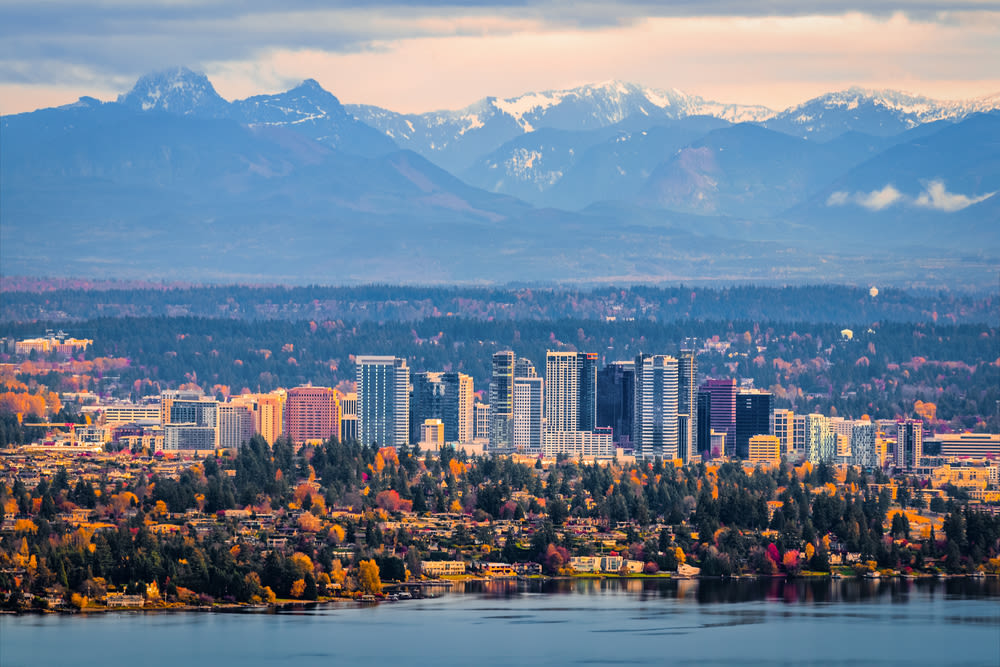

# MULTIPLE LINEAR REGRESSION MODELLING TO ANALYZE HOUSE SALES IN KING COUNTY, WASHINGTON


## Project Details

* **Contributors**: 
        Prossy Nansubuga Kamau -prossykamau@gmail.com
        Evaclaire Wamitu - evamunyika@gmail.com
        Julius Kinyua - juliusczar36@gmail.com
        Joan Nyamache - kerubonyamache@gmail.com
        Elizabeth Masai - elizabethchemtaim@gmail.com
        Kelvin Mwaura - kelvinmwaura.edu@gmail.com
        Mourine kitili- mourinekitilimourine@gmail.com
        Allan Kiplagat - allankiplgat@gmail.com
        Mitch Mathiu   - mmuriithi92@gmail.com

* **Student pace**: self paced 
* **Scheduled project review date/time**: May 2024
* **Instructor name**: Asha Deen , Lucille Kaleha
* **Blog post URL**:


## 1.0 BUSINESS UNDERSTANDING

The primary goal of the client is to create a platform that delivers accurate estimates of house prices which are crucial for both buyers and sellers in King county. To achieve this objective we need to develop a model that can identify the key factors influencing house prices. To effectively train this model the client requires precise and representative data related to the real estate market in king county, including historical sales, current listings, property size, and other relevant features.
Once trained successfully the model will be capable of providing accurate estimations of house values based on their features.
The expectation is that, once completed, the model can be used by them as a tool in selecting properties for investment in King County.


### Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Which features are most highly correlated with price?

Question 2: Which features have the strongest correlations with other predictor variables?

Question 3: What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

## 2.0 DATA UNDERSTANDING

The dataset contains 21 columns. One is of the prices of the houses, which is our target variable, and the rest will be used to make our predictions. The column names and their descriptions are as follows:
id - unique identified for a house
dateDate - house was sold
pricePrice - is prediction target
bedroomsNumber - of Bedrooms/House
bathroomsNumber - of bathrooms/bedrooms
sqft_livingsquare - footage of the home
sqft_lotsquare - footage of the lot
floorsTotal - floors (levels) in house
waterfront - House which has a view to a waterfront
view - Has been viewed
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zip
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 3.0 DATA PREPARATION

3.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from scipy import stats

In [2]:
#Loading the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

The dataset has 21597 entries and 20 columns. Most of the columns consist of numerical data which make it suitable for linear regression analysis. 

In [6]:
# Checked the number of unique values for each column
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

# 4.0 DATA CLEANING

Check for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data

Missing Values

In [7]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [8]:
#Drop the id and date column since there is no use for it


#df.drop(["id", "date"], axis= 1, inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
# check the total number of null values in each column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns waterfront, view and yr_renovated have 2376, 63 and 3842 null values respectively Lets look it further

In [11]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [12]:
# Replace the null values
df['waterfront'].fillna('NO', inplace= True)
df.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [13]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
# Replace the null values
df['view'].fillna('NONE', inplace= True)
df.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
df.dropna(subset=['yr_renovated'])

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
...           ...         ...        ...       ...        ...          ...   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21595   291310100   1/16/2015   400000.0         3       2.50         1600   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...         grade sqft_above  \
0          5650     1.0         NO  NONE  ...     7 Average       1180   
1          7242     2.0         NO  NONE  ...     7 Average       2170   
3          5000     1.0         NO  NONE  ...     7 Average       1050   
4          8080     1.0         NO  NONE  ...        8 Good       1680   
5        101930     1.0         NO  NONE  ...  11 Excellent       3890   
...         ...     ...        ...   ...  ...           ...        ...   
21592      1131     3.0         NO  NONE  ...        8 Good       1530   
21593      5813     2.0         NO  NONE  ...        8 Good       2310   
21594      1350     2.0         NO  NONE  ...     7 Average       1020   
21595      2388     2.0         NO  NONE  ...        8 Good       1600   
21596      1076     2.0         NO  NONE  ...     7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
5             1530.0     2001           0.0    98053  47.6561 -122.005   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
3               1360        5000  
4               1800        7503  
5               4760      101930  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[17755 rows x 21 columns]

In [16]:
# Fill missing values in the 'yr_renovated' column with 'NO'
df['yr_renovated'].fillna('NO', inplace= True)
df.yr_renovated.value_counts()

0.0       17011
NO         3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1971.0        1
1944.0        1
1934.0        1
1976.0        1
1959.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [17]:
#counter checking to see if there are any more missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 As evident from the previous section, the data has been thoroughly processed and is now prepared for analysis and other tasks.
 All missing values were replaced successfully.

Conversion of Date Column and Creation of New Columns

The date column represents the month and year the houses were sold. Creating new columns yr_sold and month_sold from this column will make analyzing the data easier and then dropping it since it will not be useful anymore.

In [18]:
# split the date into month, day and year
date = df['date'].str.split('/', expand=True)

# create new columns for month and year and convert to integer
df['month_sold'] = date[0].astype(int)
df['yr_sold'] = date[2].astype(int)

# drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

# check to see if changed were made
df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ... sqft_basement  yr_built yr_renovated  \
0         NO  NONE    Average  ...           0.0      1955            0   
1         NO  NONE    Average  ...         400.0      1951         1991   
2         NO  NONE    Average  ...           0.0      1933           NO   
3         NO  NONE  Very Good  ...         910.0      1965            0   
4         NO  NONE    Average  ...           0.0      1987            0   

   zipcode      lat     long  sqft_living15  sqft_lot15  month_sold  yr_sold  
0    98178  47.5112 -122.257           1340        5650          10     2014  
1    98125  47.7210 -122.319           1690        7639          12     2014  
2    98028  47.7379 -122.233           2720        8062           2     2015  
3    98136  47.5208 -122.393           1360        5000          12     2014  
4    98074  47.6168 -122.045           1800        7503           2     2015  

[5 rows x 22 columns]

Lets to create a new column age to represent the age of the houses. To get the age of the house, I got the difference between the yr_built and the year 2015

In [19]:
# create new column 'age'
df['age'] = 2015 - df['yr_built']

# drop the column for yr_built since it's not longer useful
df.drop(columns=['yr_built'], axis=1, inplace=True)

# check to see if changes were made
df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018  360000.0         3       2.50         1530      1131   
21593  6600060120  400000.0         4       2.50         2310      5813   
21594  1523300141  402101.0         2       0.75         1020      1350   
21595   291310100  400000.0         3       2.50         1600      2388   
21596  1523300157  325000.0         2       0.75         1020      1076   

       floors waterfront  view  condition  ... sqft_basement  yr_renovated  \
0         1.0         NO  NONE    Average  ...           0.0             0   
1         2.0         NO  NONE    Average  ...         400.0          1991   
2         1.0         NO  NONE    Average  ...           0.0            NO   
3         1.0         NO  NONE  Very Good  ...         910.0             0   
4         1.0         NO  NONE    Average  ...           0.0             0   
...       ...        ...   ...        ...  ...           ...           ...   
21592     3.0         NO  NONE    Average  ...           0.0             0   
21593     2.0         NO  NONE    Average  ...           0.0             0   
21594     2.0         NO  NONE    Average  ...           0.0             0   
21595     2.0         NO  NONE    Average  ...           0.0             0   
21596     2.0         NO  NONE    Average  ...           0.0             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  month_sold  \
0       98178  47.5112 -122.257           1340        5650          10   
1       98125  47.7210 -122.319           1690        7639          12   
2       98028  47.7379 -122.233           2720        8062           2   
3       98136  47.5208 -122.393           1360        5000          12   
4       98074  47.6168 -122.045           1800        7503           2   
...       ...      ...      ...            ...         ...         ...   
21592   98103  47.6993 -122.346           1530        1509           5   
21593   98146  47.5107 -122.362           1830        7200           2   
21594   98144  47.5944 -122.299           1020        2007           6   
21595   98027  47.5345 -122.069           1410        1287           1   
21596   98144  47.5941 -122.299           1020        1357          10   

       yr_sold  age  
0         2014   60  
1         2014   64  
2         2015   82  
3         2014   50  
4         2015   28  
...        ...  ...  
21592     2014    6  
21593     2015    1  
21594     2014    6  
21595     2015   11  
21596     2014    7  

[21597 rows x 22 columns]

In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_renovated   21597 non-null  object 
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

The data has been cleaned successfully.

We then plotted some visualizations to understand the characteristics of the various features in our dataset.

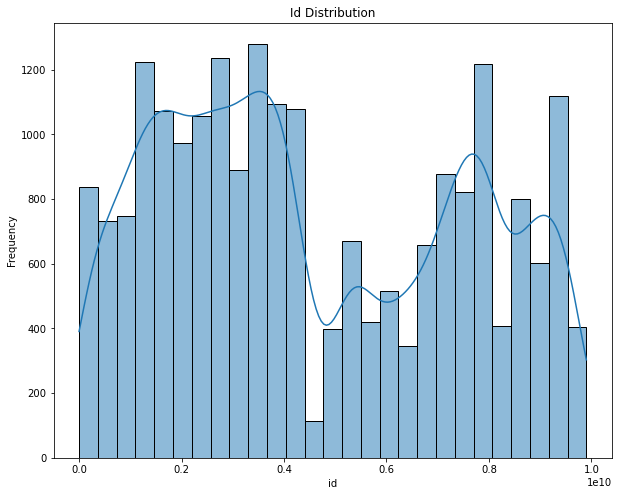

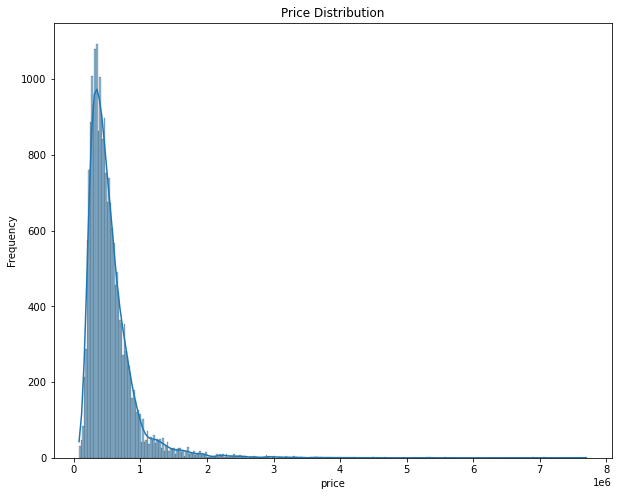

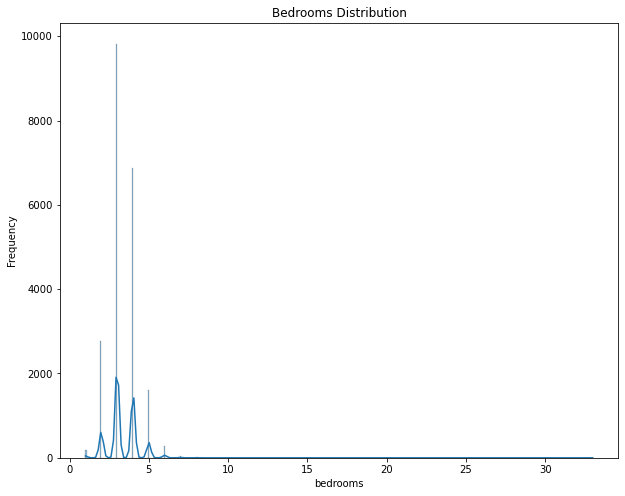

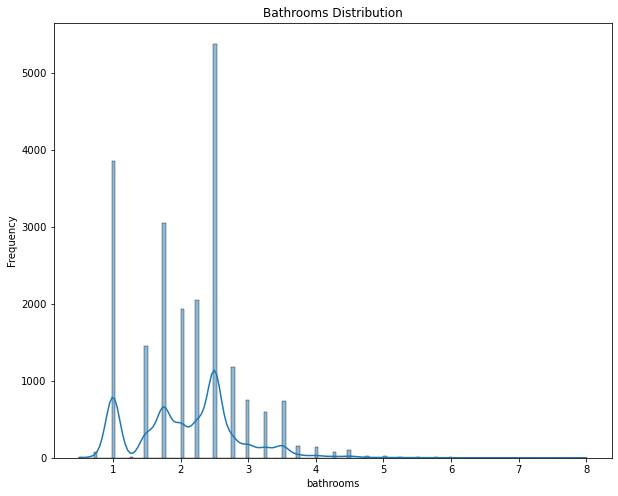

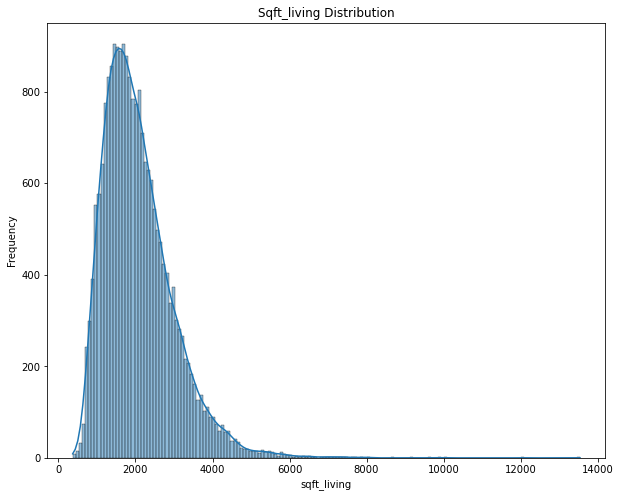

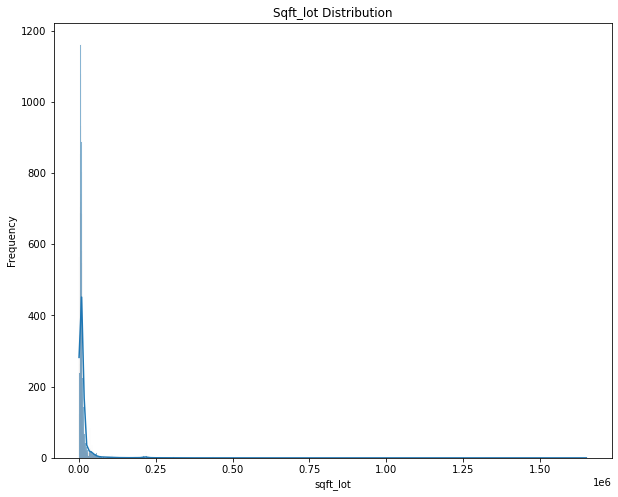

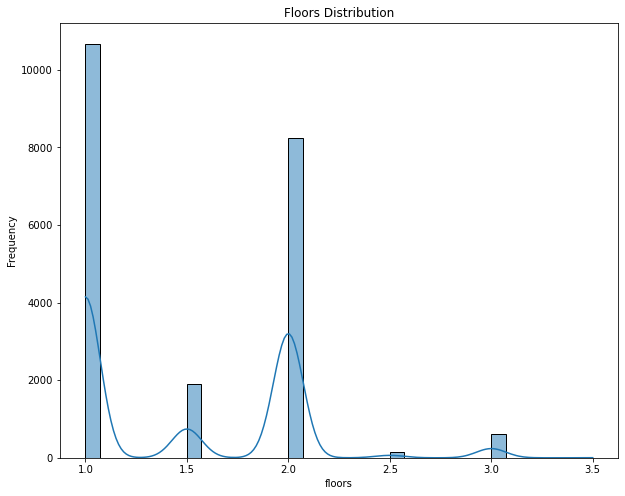

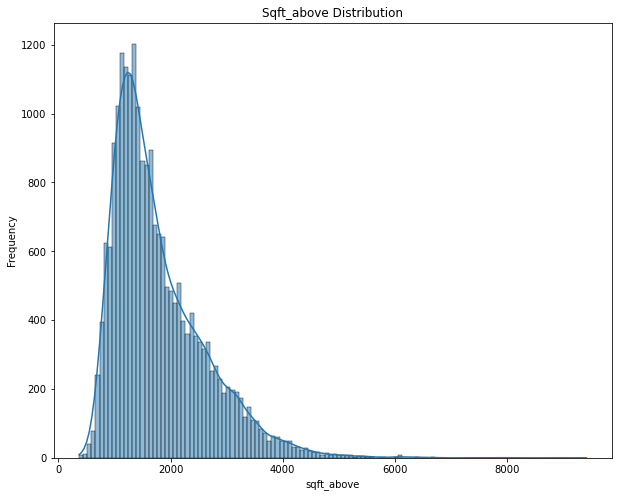

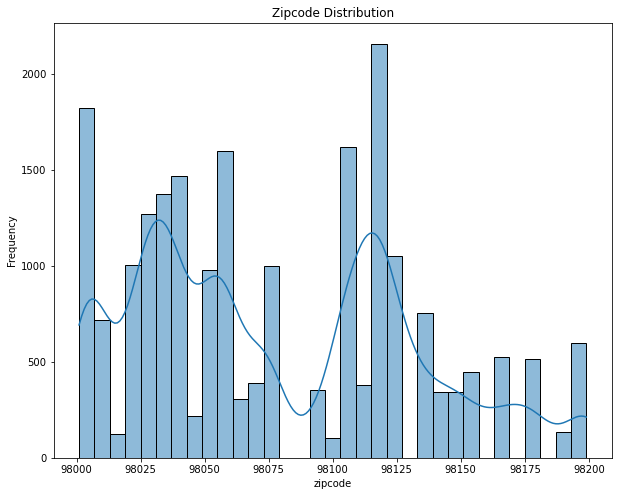

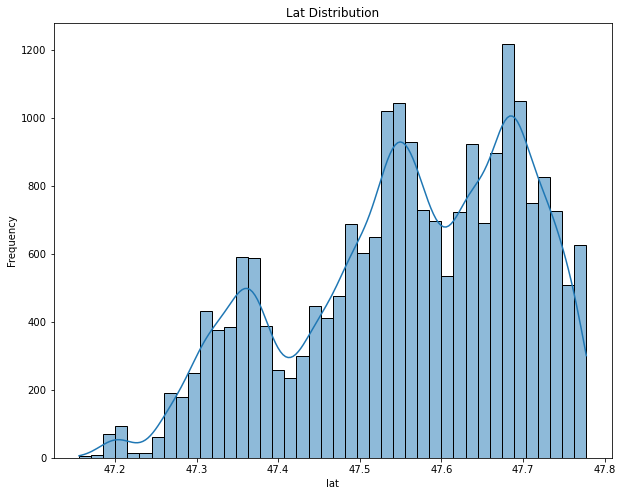

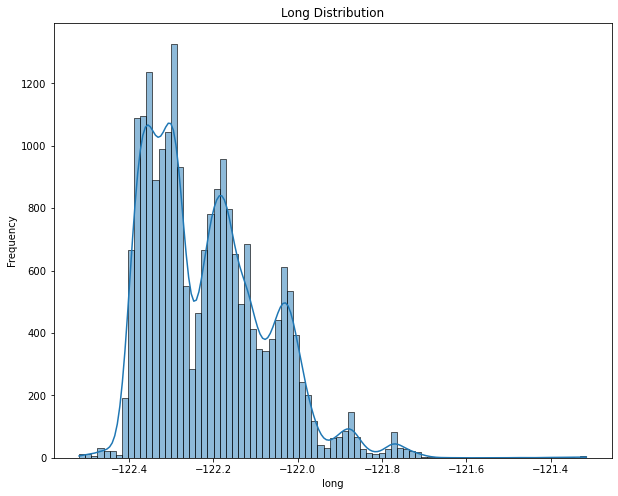

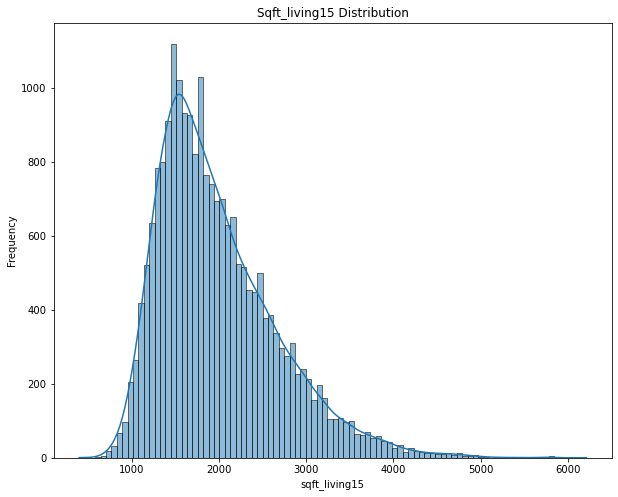

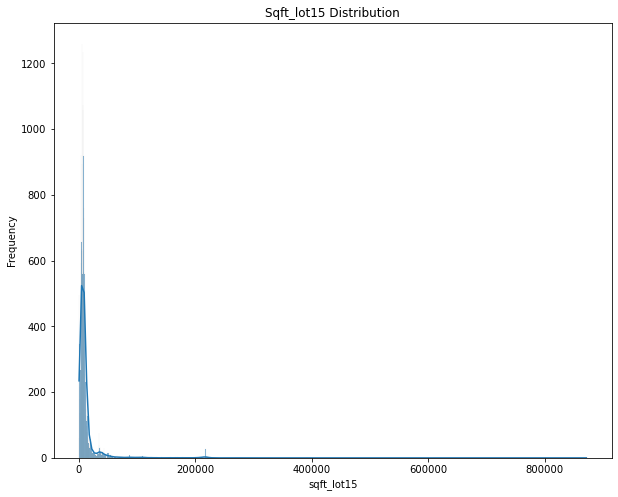

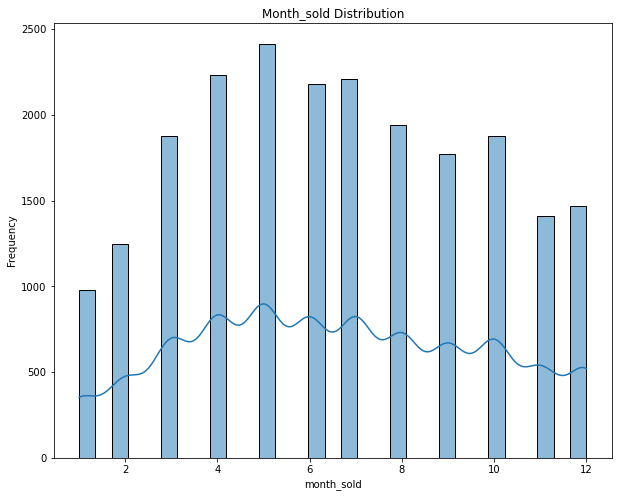

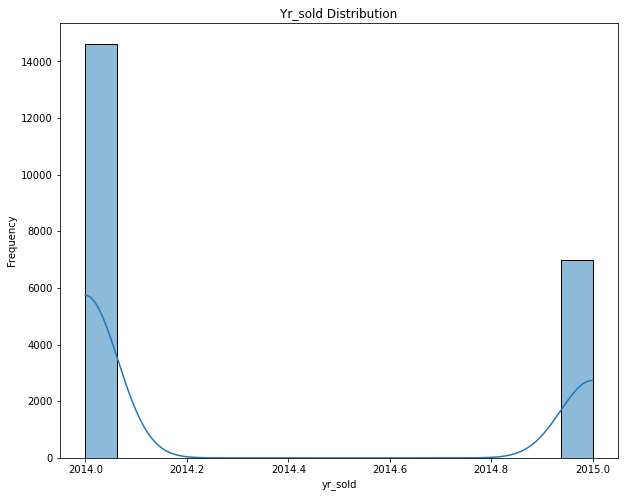

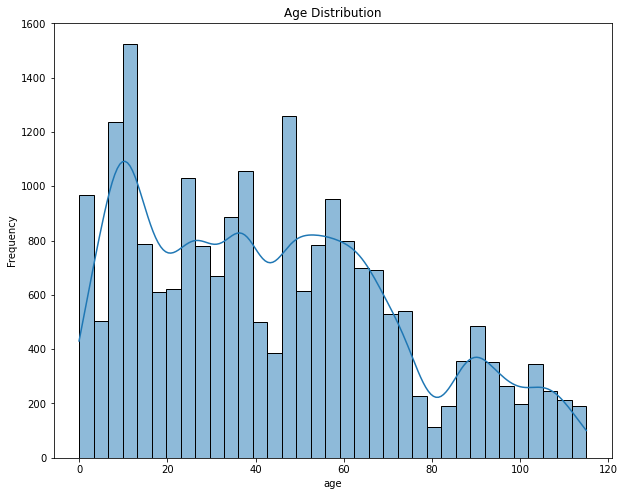

In [21]:
def variable_histogram(df, log_transform=False):
    """
    Generates histograms for all numeric variables in the dataset.
    
    Parameters:
        df (pandas.DataFrame): The dataset to be analyzed.
        log_transform (bool): Whether to apply a log transformation to the variables.
    """
    for variable in df.select_dtypes(include=[np.number]).columns:
        plt.figure(figsize=(10, 8))
        if log_transform:
            variable_log = np.log(df[variable])
            sns.histplot(data=df, x=variable_log, kde=True)
        else:
            sns.histplot(data=df, x=variable, kde=True)
        plt.title(f"{variable.capitalize()} Distribution")
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        plt.show()
        
        
variable_histogram(df)   

# 5.0 DATA VISUALIZATION

Prior to the modeling process, we needed to create visualizations in order to analyse some of the trends in the data.

We created a correlation matrix in order to identify highly correlated variables in the data.

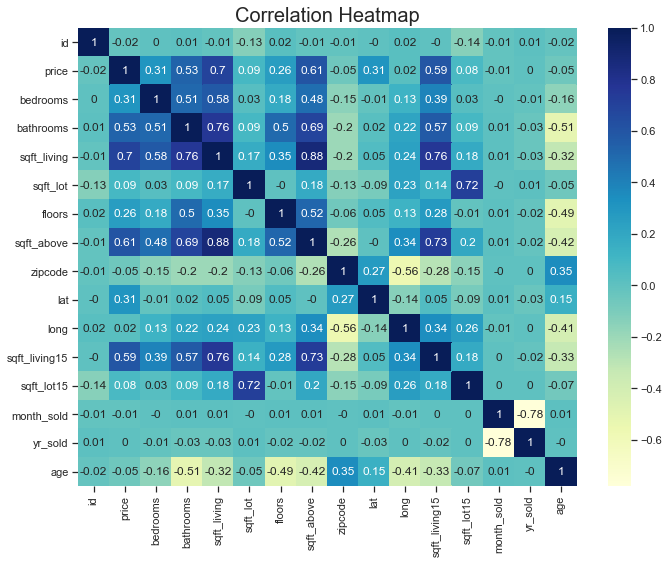

In [22]:
# creating a correlation matrix
correlation_matrix = df.corr()
rounded_corr_matrix = np.round(correlation_matrix, 2)

# setting seaborn theme 
sns.set_theme(style='ticks')

# plotting correlation matrix heatmap and displaying correlation coefficients within the plot using annot
plt.figure(figsize=(10,8))
sns.heatmap(rounded_corr_matrix, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap', fontsize=20)

# Adjusting the layout of the plot for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig1.png');

From the heatmap above, we could see that there are relatively strong positive correlations between price and sqft_living at 0.7, sqft_above at 0.61, sqft_living15 at 0.59 and number of bathrooms at 0.53.

The weakest positive correlations were between price and number of bedrooms at 0.31, sqft_lot at 0.09, number of floors at 0.26 and sqft_lot15 at 0.08.

The weakest inverse correlations were between price and zipcode and age at -0.05, and month sold at -0.01.





Next we wanted to investigate house price trends over the year and over the specific months/seasons.

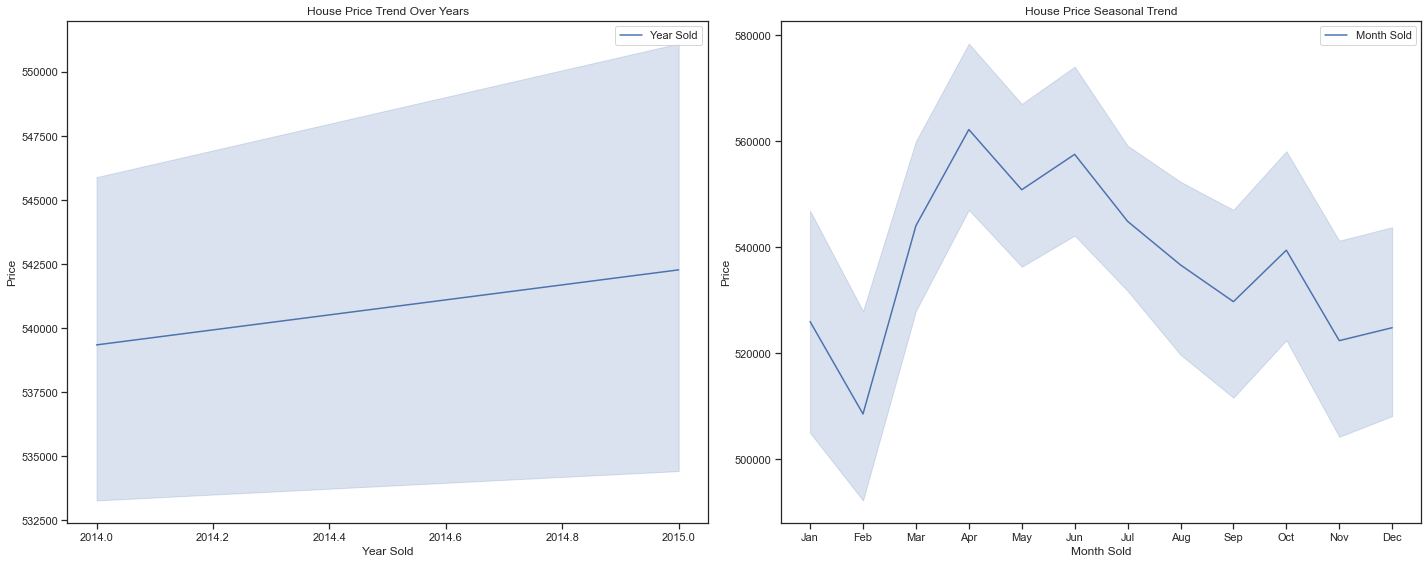

In [23]:
# setting seaborn theme 
sns.set_theme(style='ticks')

# Creating a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting price vs. yr_sold and price vs. month_sold on  same axes
for i, (x_col, title, xlabel) in enumerate([('yr_sold', 'House Price Trend Over Years', 'Year Sold'),
                                            ('month_sold', 'House Price Seasonal Trend', 'Month Sold')]):
    sns.lineplot(x=x_col, y='price', data=df, ax=axes[i], label=xlabel)
    axes[i].set_title(title)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Price')
    if x_col == 'month_sold':
        axes[i].set_xticks(range(1, 13))
        axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjusting the layout of the subplots for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig2.png');

We can clearly see that house prices were on a steady rise from 2014 to 2015 with the highest house prices recorded in the month of April and the lowest in the month of February. Investigations are required to find out why house prices drastically rose between February and April and why prices fell between June and September.

The next step was to explore the distributions of the variables with the strongest positive relationships with price.

The skewness of the price plot is 4.023364652271239
The kurtosis of the price plot is 34.54135857673376 

The skewness of the sqft_living plot is 1.473215455425834
The kurtosis of the sqft_living plot is 5.252101950846816 

The skewness of the sqft_above plot is 1.4474342353857224
The kurtosis of the sqft_above plot is 3.405519761077342 

The skewness of the sqft_living15 plot is 1.1068753971161713
The kurtosis of the sqft_living15 plot is 1.591732789053459


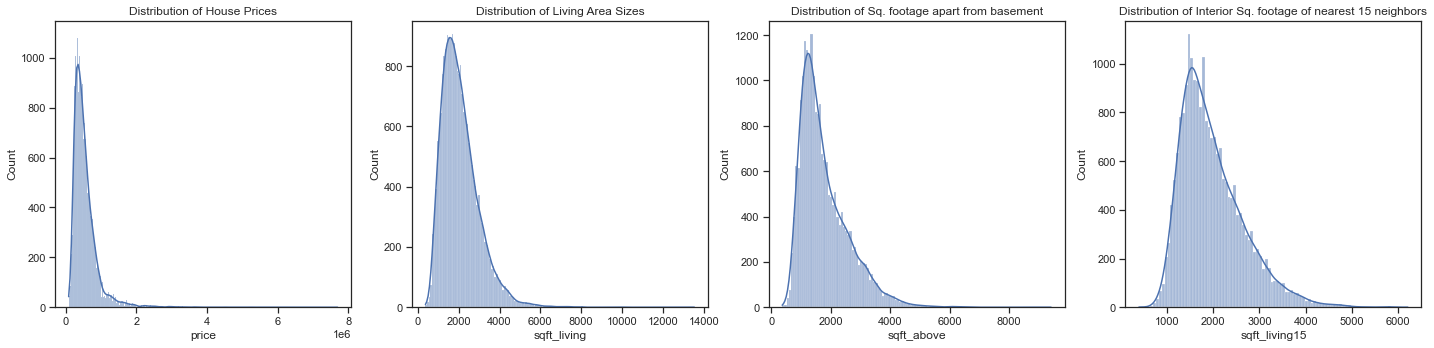

In [24]:
# setting seaborn theme 
sns.set_theme(style='ticks')

# Creating a figure with 1 row and 4 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Defining the variables and titles for the histograms
variables = ['price', 'sqft_living', 'sqft_above', 'sqft_living15']
titles = ['House Prices', 'Living Area Sizes', 'Sq. footage apart from basement', 'Interior Sq. footage of nearest 15 neighbors']

# Iterating over the variables and titles to create histograms
for i, var in enumerate(variables):
    # Plot the histogram for the current variable
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    
    # Setting the title for the current subplot based on the corresponding title
    axes[i].set_title(f'Distribution of {titles[i]}')
    
# Adjusting the layout of the subplots for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig3.png');

print('The skewness of the price plot is', df['price'].skew())
print('The kurtosis of the price plot is', df['price'].kurt(), '\n')
print('The skewness of the sqft_living plot is', df['sqft_living'].skew())
print('The kurtosis of the sqft_living plot is', df['sqft_living'].kurt(), '\n')
print('The skewness of the sqft_above plot is', df['sqft_above'].skew())
print('The kurtosis of the sqft_above plot is', df['sqft_above'].kurt(), '\n')
print('The skewness of the sqft_living15 plot is', df['sqft_living15'].skew())
print('The kurtosis of the sqft_living15 plot is', df['sqft_living15'].kurt())

1. Distribution of House Prices: This histogram shows the frequency of houses at different price points. The distribution appears to be slightly right-skewed with a skewness of 4.02 meaning the data has a long right tail, with more extreme high values compared to low values. This indicates that there are more houses at higher price ranges than lower ones. However, there is still a significant number of houses in the lower price ranges as well. The kurtosis of the price plot is 34.54 which is much greater than 3. This indicates a leptokurtic distribution, meaning the distribution has a sharp peak and heavy tails. This suggests the presence of many outliers or extreme values in the price data.

2. Distribution of Living Area Sizes(sqft_living): This graph displays the distribution of living area sizes, in square feet, for the houses in the dataset. The distribution is roughly bell-shaped, which is a typical pattern for many real-world variables. The skewness of the sqft_living plot is 1.47, which indicates a moderately positively skewed distribution. The data has more high values than low values. The peak of the distribution suggests that most houses have living areas clustered around a specific size range, with fewer houses having very small or very large living areas. The kurtosis of the sqft_living plot is 5.25, which is greater than 3. This indicates a leptokurtic distribution, with a sharper peak and heavier tails compared to a normal distribution.

3. Distribution of Sq. Footage apart from the basement: This histogram shows the distribution of the square footage of the houses, excluding the basement area. The skewness of the sqft_above plot is 1.45, which indicates a moderately positively skewed distribution. The distribution is similar to the living area sizes, with a bell-shaped curve indicating that most houses have a specific range of square footage, and fewer houses have very small or very large square footage. The kurtosis of the sqft_above plot is 3.41, which is close to 3. This suggests a distribution that is similar to a normal distribution, with a peak and tails that are not significantly different from a normal distribution.

4. Distribution of Interior Sq. footage of nearest 15 neighbors: This graph depicts the distribution of the interior square footage of the 15 nearest neighboring houses. The skewness of the sqft_living15 plot is 1.11, which indicates a moderately positively skewed distribution. The distribution is bell-shaped, similar to the previous two graphs, suggesting that houses in a given neighborhood tend to have similar interior square footage sizes. The kurtosis of the sqft_living15 plot is 1.59, which is less than 3. This indicates a platykurtic distribution, with a flatter peak and lighter tails compared to a normal distribution.

Next we used the boxcox function from the scipy.stats module to perform the Box-Cox transformation on the columns from the previous plots. The boxcox function returns two values: the transformed data and the optimal lambda value for the transformation. Since we only needed the transformed values, we stored the transformed data in new columns with the suffix '_normalized' and then created histograms for the normalized variables.

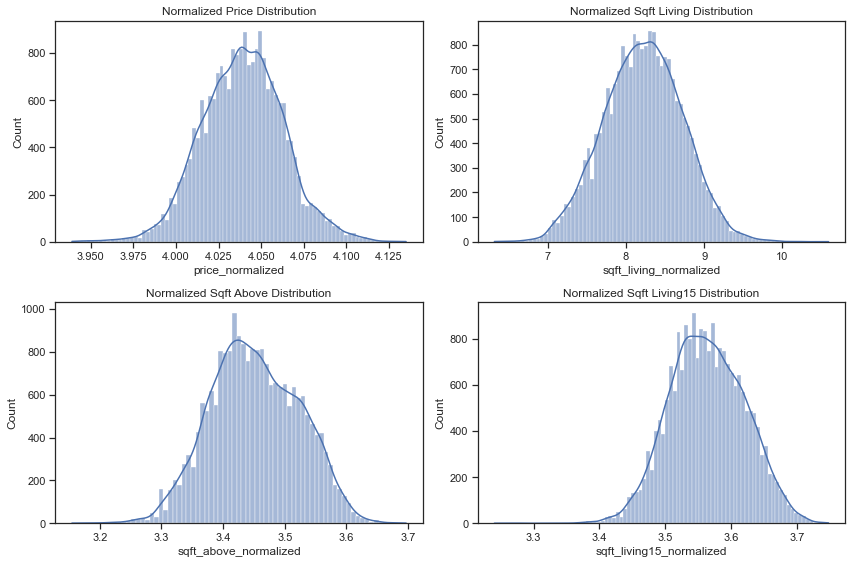

In [25]:
from scipy.stats import boxcox

# Normalize the 'price' column
df['price_normalized'], _ = boxcox(df['price'])
    
# Normalize the 'sqft_living' column
df['sqft_living_normalized'], _ = boxcox(df['sqft_living'])
    
# Normalize the 'sqft_above' column
df['sqft_above_normalized'], _ = boxcox(df['sqft_above'])
    
# Normalize the 'sqft_living15' column
df['sqft_living15_normalized'], _ = boxcox(df['sqft_living15'])
    

def plot_normalized_data(df):
    """
    Plot histograms of the normalized data.
    
    Parameters:
        df (pandas.DataFrame): The dataset with normalized columns.
    """
    
    # setting seaborn theme 
    sns.set_theme(style='ticks')
    
    plt.figure(figsize=(12, 8))
    
    # Plotting histogram of the 'price_normalized' column
    plt.subplot(2, 2, 1)
    sns.histplot(df['price_normalized'], kde=True)
    plt.title('Normalized Price Distribution')
    
    # Plotting histogram of the 'sqft_living_normalized' column
    plt.subplot(2, 2, 2)
    sns.histplot(df['sqft_living_normalized'], kde=True)
    plt.title('Normalized Sqft Living Distribution')
    
    # Plotting histogram of the 'sqft_above_normalized' column
    plt.subplot(2, 2, 3)
    sns.histplot(df['sqft_above_normalized'], kde=True)
    plt.title('Normalized Sqft Above Distribution')
    
    # Plotting histogram of the 'sqft_living15_normalized' column
    plt.subplot(2, 2, 4)
    sns.histplot(df['sqft_living15_normalized'], kde=True)
    plt.title('Normalized Sqft Living15 Distribution')
    
    # Adjusting the layout of the subplots for better visualization
    plt.tight_layout()
    plt.savefig('./fig4.png');

# Call the function to plot the histograms of the normalized data
plot_normalized_data(df)

Below we analyzed the variation of average house prices as per the overall condition of a house, whether a house is located on a waterfront or not, the quality of views from the house and the number of floors/ levels in a house.

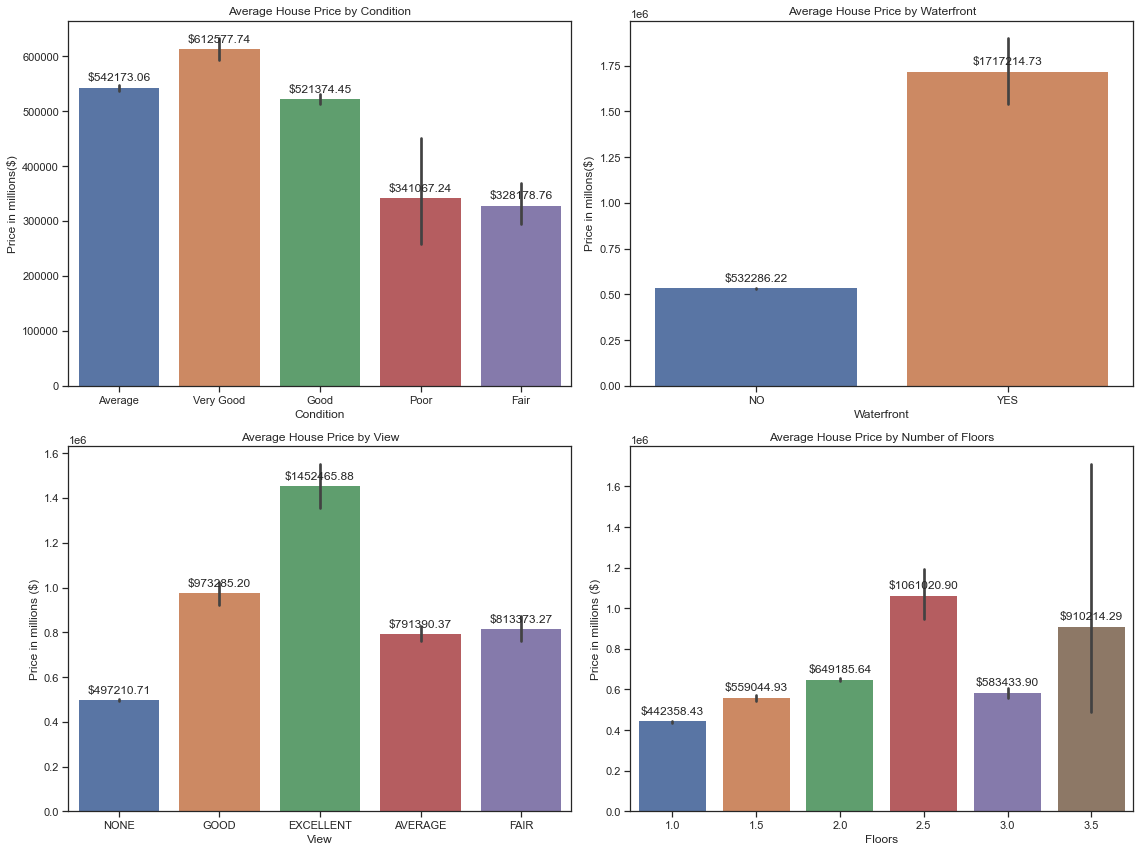

In [26]:
# Defining the plots to be created
plots = [
    ('Average House Price by Condition', 'condition', 'Price in millions($)'),
    ('Average House Price by Waterfront', 'waterfront', 'Price in millons($)'),
    ('Average House Price by View', 'view', 'Price in millions ($)'),
    ('Average House Price by Number of Floors', 'floors', 'Price in millions ($)'),
]

# setting seaborn theme 
sns.set_theme(style='ticks')

# Creating a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Iterating over the plots and create bar plots for each
for i, (title, x_col, y_col) in enumerate(plots):
    # Create a bar plot for the current plot
    sns.barplot(x=x_col, y='price', data=df, ax=axes[i], edgecolor='none')
    
    # Adding annotations for the price values on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
    # Setting the title, x-axis label, and y-axis label for the current subplot
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col)
    
# Adjusting the layout of the subplots for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig5.png');

Next was to analyze the distribution of average house prices per zipcode.

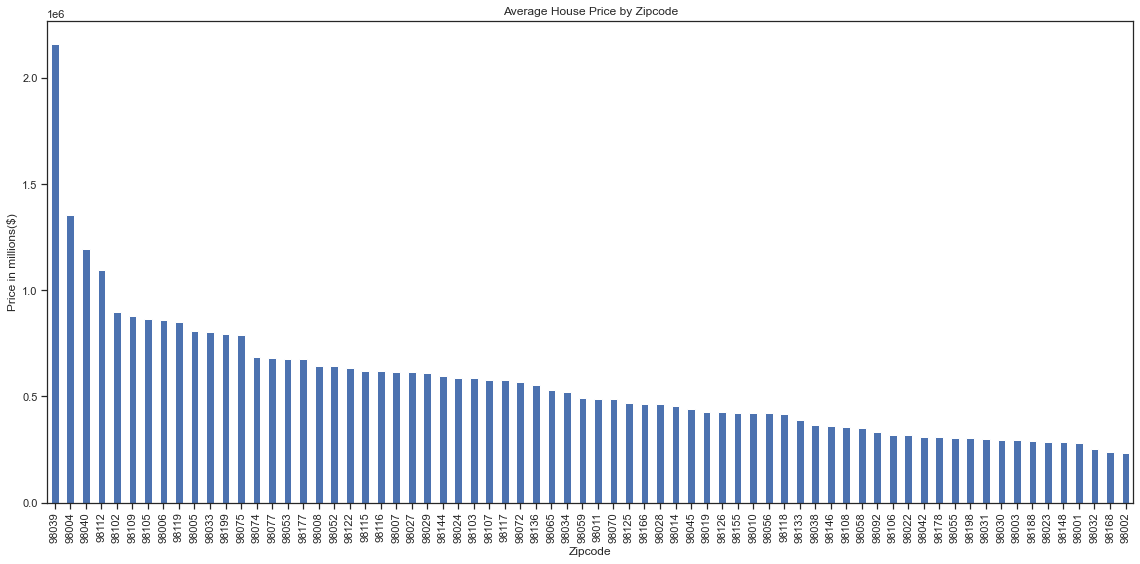

In [27]:
# setting seaborn theme 
sns.set_theme(style='ticks')

# Creating a figure with a single subplot
fig, ax = plt.subplots(figsize=(16, 8))

# Grouping the data by zipcode, calculating mean price for each zipcode & sorting by mean price in descending order
price_by_zipcode = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Creating a bar plot of the average price per zipcode
price_by_zipcode.plot(kind='bar', ax=ax)

# Setting the title, x-axis label, and y-axis label for the plot
ax.set_title('Average House Price by Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price in millions($)')

# Rotating the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Adjusting the layout for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig6.png');

From the above plot we can see that houses in Medina City (zipcode 98039) have the highest average prices while houses in Auburn City (zipcode 98002) have the lowest average prices. The next step was to assess the change in house price values as per the grade, condition and waterfront location of a house with and without outliers using box plots as shown below.

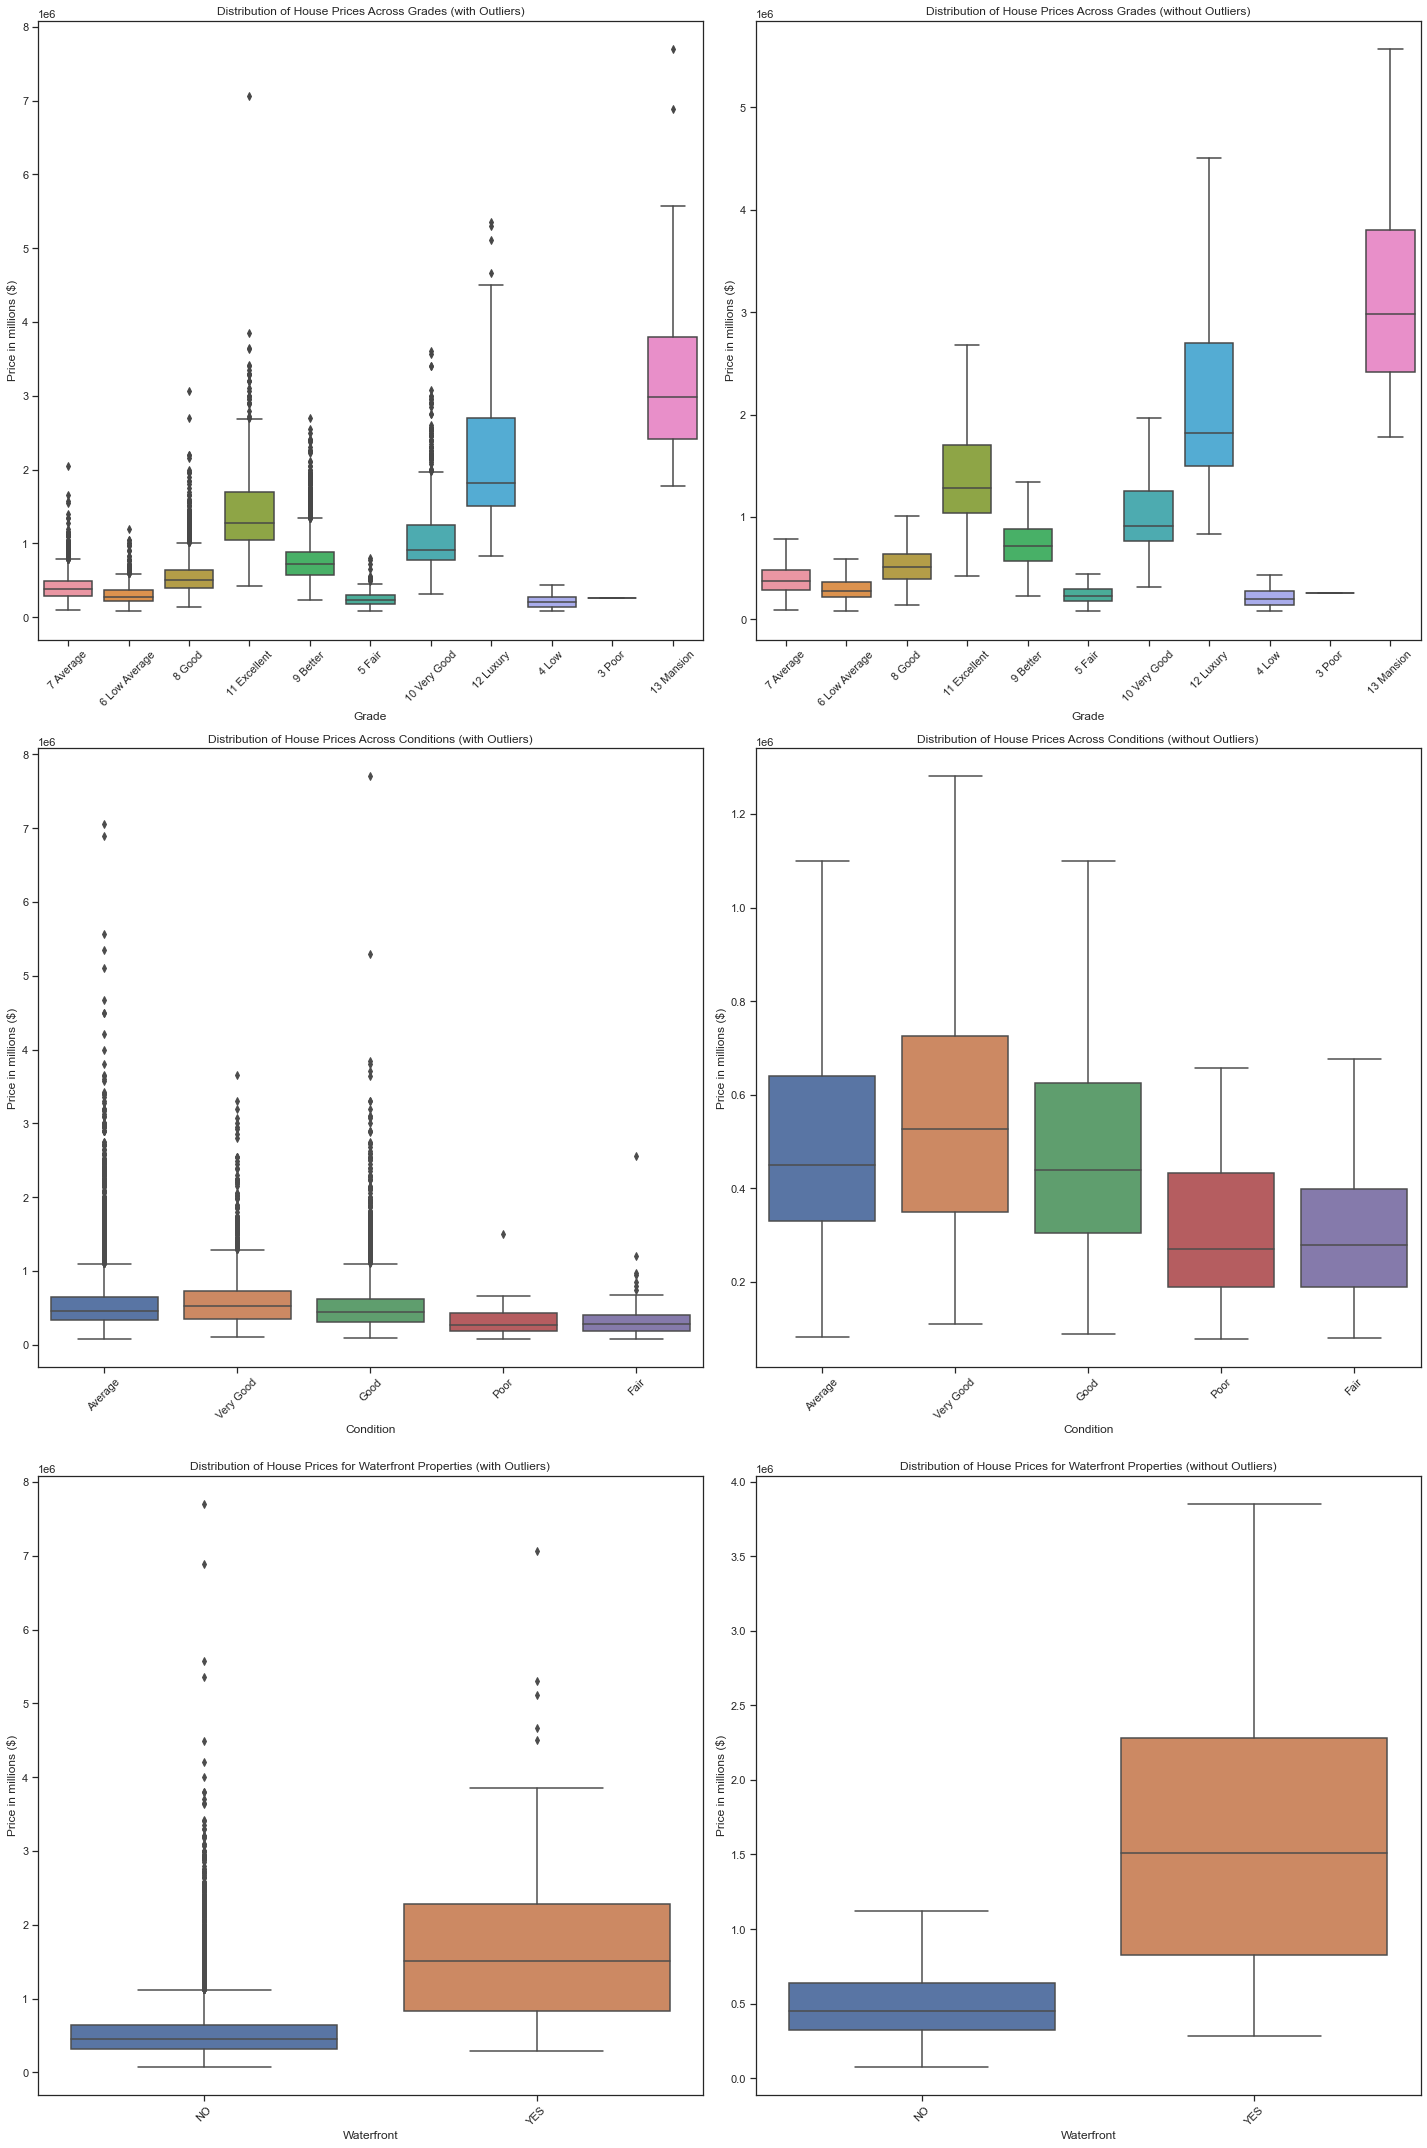

In [28]:
# Defining the features and titles for the boxplots
features = [
    ('grade', 'Distribution of House Prices Across Grades'),
    ('condition', 'Distribution of House Prices Across Conditions'),
    ('waterfront', 'Distribution of House Prices for Waterfront Properties')
]

# setting seaborn theme 
sns.set_theme(style='ticks')

# Creating a figure with multiple subplots
fig, axes = plt.subplots(len(features), 2, figsize=(20, 30))

# Iterating over the features and titles to create boxplots
for i, (feature, title) in enumerate(features):
    # Creating boxplots with outliers
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"{title} (with Outliers)")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Creating boxplots without outliers
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i, 1], showfliers=False)
    axes[i, 1].set_title(f"{title} (without Outliers)")
    axes[i, 1].tick_params(axis='x', rotation=45)

    # Setting x-axis and y-axis labels for both subplots
    axes[i, 0].set_xlabel(feature.capitalize())
    axes[i, 0].set_ylabel('Price in millions ($)')
    axes[i, 1].set_xlabel(feature.capitalize())
    axes[i, 1].set_ylabel('Price in millions ($)')
    
# Adjusting the layout of the subplots for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig7.png');

We can see that the median house prices increased when outliers were removed from the data. We can therefore conclude that house prices in King County were affected by outliers to a certain extent. 

We then created a grid of scatterplots to visualise and better explore the relationships between multiple variables listed below. This allowed us to infer which variables showed linear relationships with one another.

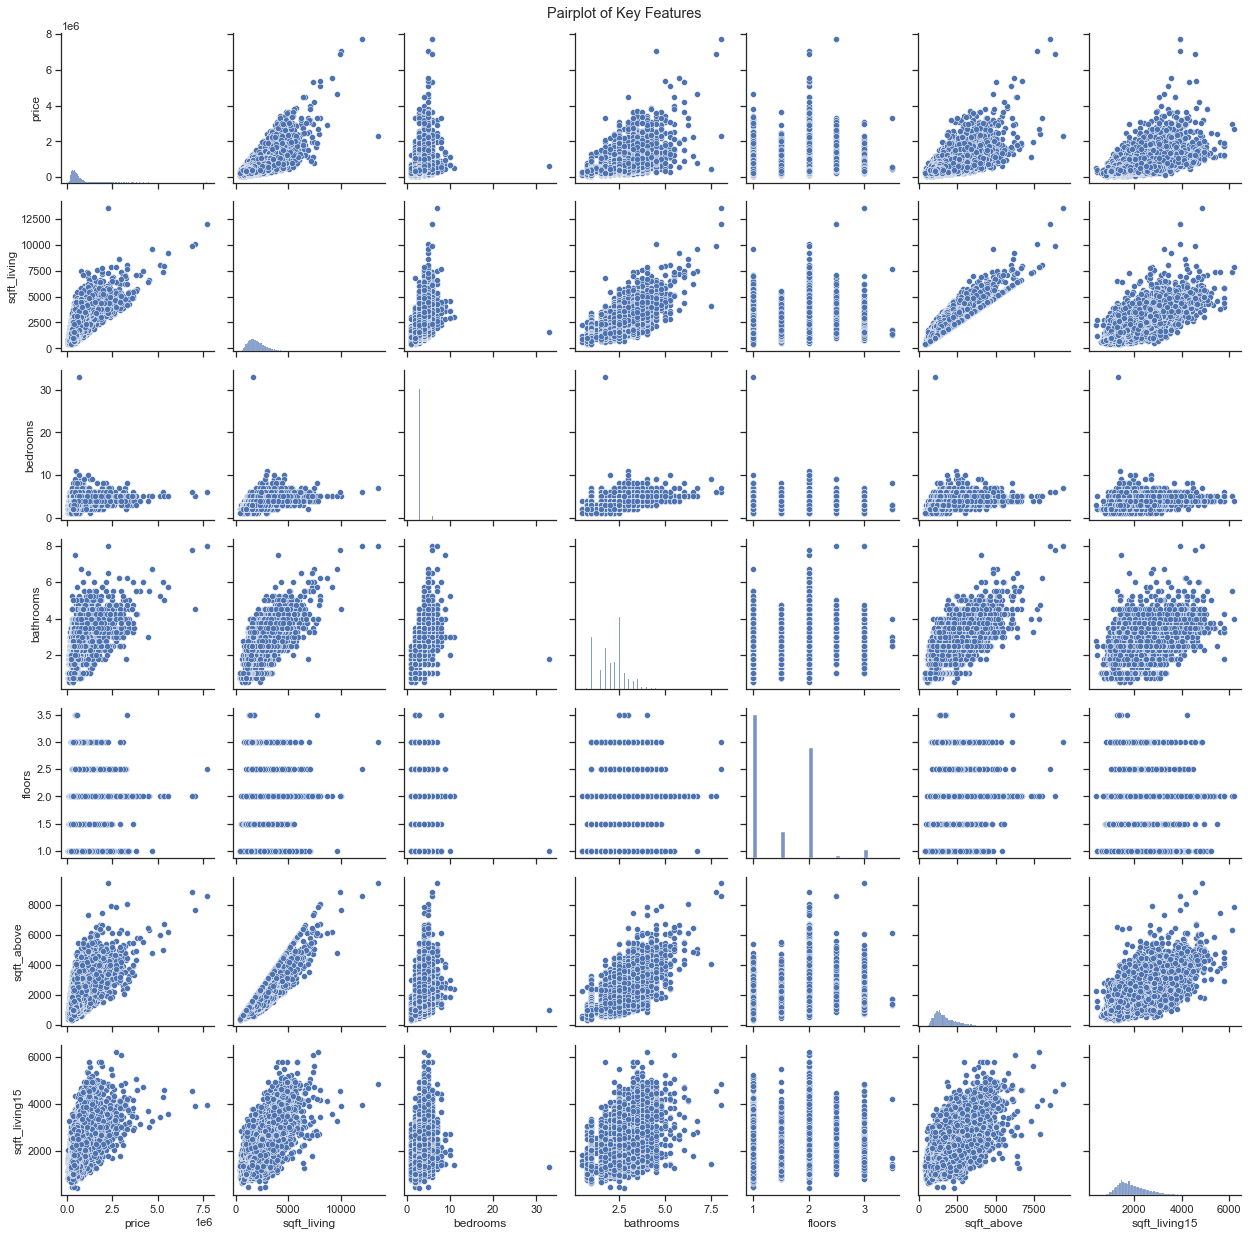

In [29]:
# Defining the variables for the scatter plot matrix
scatter_vars = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_living15']

# setting seaborn theme 
sns.set_theme(style='ticks')

# Creating a pairplot for the selected variables
sns.pairplot(df[scatter_vars], kind='scatter', diag_kind='hist')

# Setting the overall title for the pairplot
plt.suptitle('Pairplot of Key Features')

# Adjusting the layout of the subplots for better visualization
plt.tight_layout()

# saving figure
plt.savefig('./fig8.png');

Lastly, we created an interactive map to showcase our study area, King County, and the distribution of house prices per zipcode.

In [30]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on the average latitude and longitude
map_center = [df['lat'].mean(), df['long'].mean()]
map_zoom = 10
m = folium.Map(location=map_center, zoom_start=map_zoom)

# Add a GeoJSON layer for the boundaries
folium.GeoJson('data/zipcode_kc.geojson', name='geojson').add_to(m)

# Creating a Choropleth map color-coded by house prices
# Red represents higher priced houses
# Yellow represents lower priced houses 
folium.Choropleth(
    geo_data='data/zipcode_kc.geojson',
    data=df,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZIP',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='House Prices'
).add_to(m)

# Adding markers to make the map more interactive by showing house prices per zipcode
marker_cluster = MarkerCluster().add_to(m)
for i in range(df.shape[0]):
    location = [df['lat'][i], df['long'][i]]
    tooltip = f"Zipcode: {df['zipcode'][i]}"
    folium.Marker(
        location,
        popup=f"Sales price: ${round(df['price'][i], 2)}",
        tooltip=tooltip
    ).add_to(marker_cluster)


# saving map to a HTML file
# m.save('./my_map.html')

# Displaying the map    
#m

In order to preview the interactive map, please download the notebook and uncomment the 'm' at the bottom of the code as map will not display on Github. Alternatively, paste 'my_map.html' contained in the images folder into your browser of choice. Below is a preview of the map:

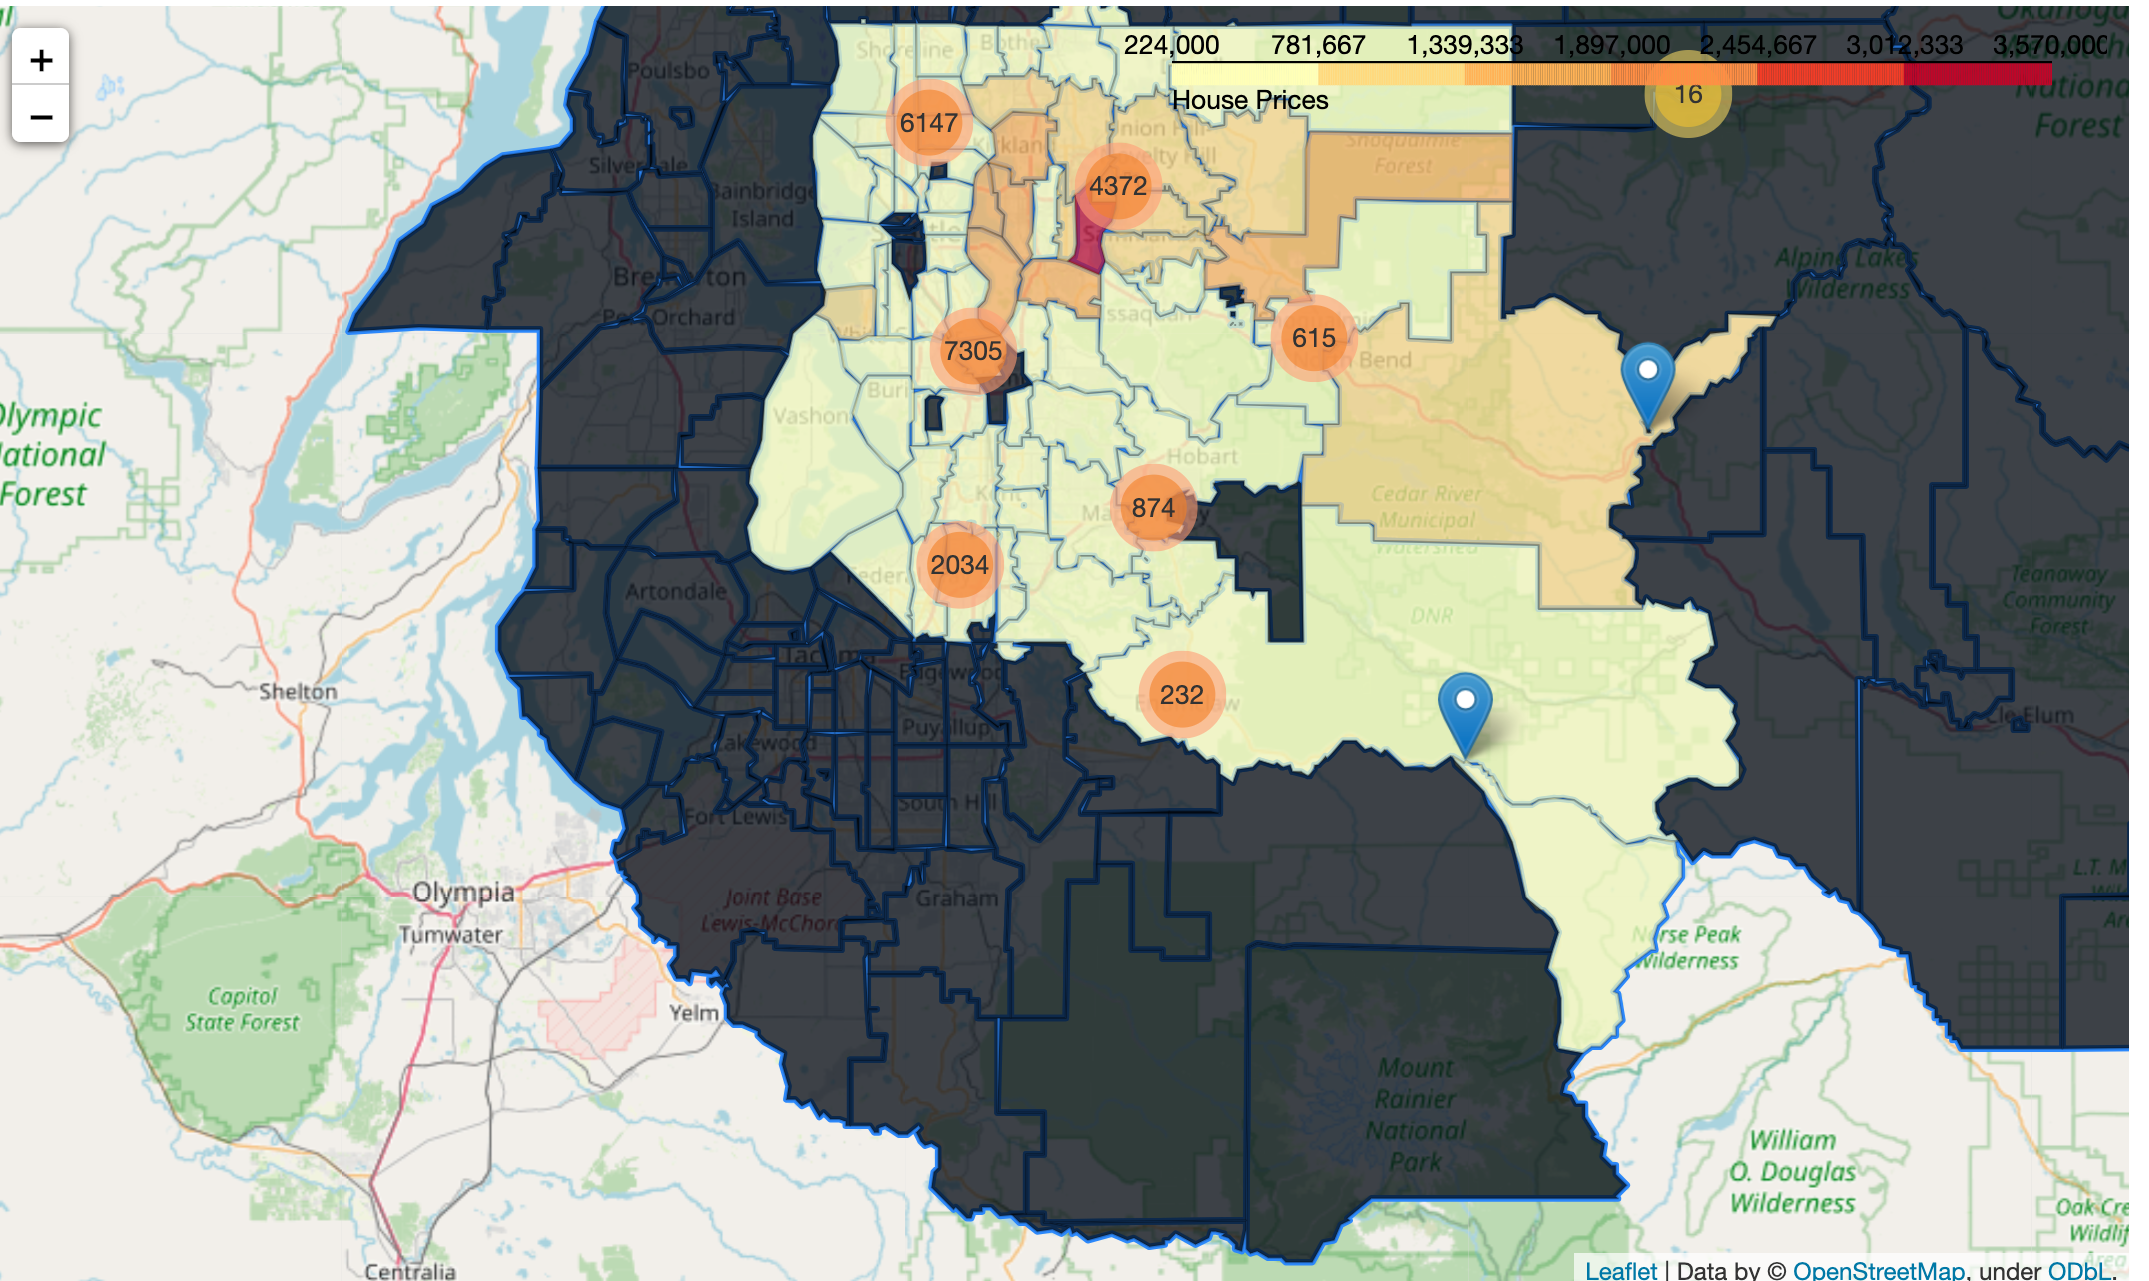

# 6.0 Modeling

Let's begin the modeling section by taking a general overview on the variables that have a strong correlation with the price:

In [31]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_above', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     7003.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:31:47   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.815e+04   5252.893     -7.262      

Based on the analysis we did above (under visualizaton section), we found that the square footage of living space (sqft_living) shows the strongest positive correlation with the price, marked at 0.7. This indicates that the size of the living area significantly impacts the price. On the other hand, the year the house was built (yr built) has a weaker positive correlation with price, at 0.5, suggesting that the house's age has a less pronounced effect on its price.

Therefore, we can proceed to develop a linear regression model with price as the dependent variable and sqft_living as the independent variable to determine the coefficient and y-intercept.

In [32]:
# Creating a linear regression
h_price = df['price']
living = df['sqft_living']

y = h_price
X_baseline = living

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:31:47   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [33]:
# look for the mean absolute error
mae = baseline_results.resid.abs().sum()/ len(X_baseline)
mae

173824.88749617487

The model has an R-squared value of 0.49, which means it explains 49% of the variation in price and is statistically significant. The model's predictions deviate by 173,824 dollars. The intercept and coefficient for sqft_living are approximately -$43,990 and 281, respectively, both of which are statistically significant.

Therefore, the formula to estimate the price based on sqft_living is:

**price = (281 * sqft_living) - 43990**

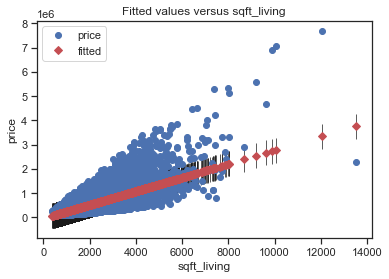

In [34]:
# Plot actual results and predicted

sm.graphics.plot_fit(baseline_results, "sqft_living",)
plt.savefig('./fig10.png');

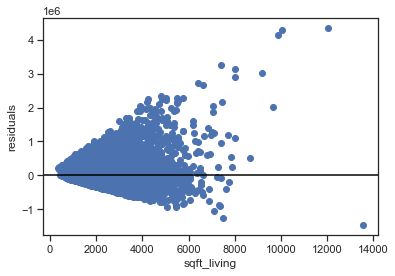

In [35]:
# plot the residuals 
fig, ax = plt.subplots()

ax.scatter(living, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals")
plt.savefig('./fig11.png');

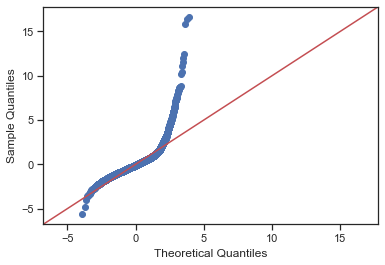

In [36]:
# Create a qqplot

sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True)
plt.savefig('./fig12.png');



We are now considering the development of a multilinear model to incorporate all the other features we are interested in to understand their impact on price. This approach will be grounded on the initial linear regression, which will serve as the foundational model.

During visualization, grade also appeared seems to give us more information on the house so we will choose that as the categorical column and combine it with sqft_living and sqft_living15

In [37]:
X_multi = df[
    ['sqft_living', 'sqft_living15', 'sqft_above', 'grade']
    ]

In [38]:
# Make dummies for the categiorical data
X_multi = pd.get_dummies(X_multi, columns= ['grade'])
X_multi

sqft_living  sqft_living15  sqft_above  grade_10 Very Good  \
0             1180           1340        1180                   0   
1             2570           1690        2170                   0   
2              770           2720         770                   0   
3             1960           1360        1050                   0   
4             1680           1800        1680                   0   
...            ...            ...         ...                 ...   
21592         1530           1530        1530                   0   
21593         2310           1830        2310                   0   
21594         1020           1020        1020                   0   
21595         1600           1410        1600                   0   
21596         1020           1020        1020                   0   

       grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
0                       0                0                 0             0   
1                       0                0                 0             0   
2                       0                0                 0             0   
3                       0                0                 0             0   
4                       0                0                 0             0   
...                   ...              ...               ...           ...   
21592                   0                0                 0             0   
21593                   0                0                 0             0   
21594                   0                0                 0             0   
21595                   0                0                 0             0   
21596                   0                0                 0             0   

       grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
0                0             0                    0                1   
1                0             0                    0                1   
2                0             0                    1                0   
3                0             0                    0                1   
4                0             0                    0                0   
...            ...           ...                  ...              ...   
21592            0             0                    0                0   
21593            0             0                    0                0   
21594            0             0                    0                1   
21595            0             0                    0                0   
21596            0             0                    0                1   

       grade_8 Good  grade_9 Better  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 1               0  
...             ...             ...  
21592             1               0  
21593             1               0  
21594             0               0  
21595             1               0  
21596             0               0  

[21597 rows x 14 columns]

In [39]:
# To avoid multicolinearity drop pick a refrence column and drop it
X_multi.drop('grade_7 Average', axis = 1, inplace= True)
X_multi

sqft_living  sqft_living15  sqft_above  grade_10 Very Good  \
0             1180           1340        1180                   0   
1             2570           1690        2170                   0   
2              770           2720         770                   0   
3             1960           1360        1050                   0   
4             1680           1800        1680                   0   
...            ...            ...         ...                 ...   
21592         1530           1530        1530                   0   
21593         2310           1830        2310                   0   
21594         1020           1020        1020                   0   
21595         1600           1410        1600                   0   
21596         1020           1020        1020                   0   

       grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
0                       0                0                 0             0   
1                       0                0                 0             0   
2                       0                0                 0             0   
3                       0                0                 0             0   
4                       0                0                 0             0   
...                   ...              ...               ...           ...   
21592                   0                0                 0             0   
21593                   0                0                 0             0   
21594                   0                0                 0             0   
21595                   0                0                 0             0   
21596                   0                0                 0             0   

       grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_8 Good  \
0                0             0                    0             0   
1                0             0                    0             0   
2                0             0                    1             0   
3                0             0                    0             0   
4                0             0                    0             1   
...            ...           ...                  ...           ...   
21592            0             0                    0             1   
21593            0             0                    0             1   
21594            0             0                    0             0   
21595            0             0                    0             1   
21596            0             0                    0             0   

       grade_9 Better  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
21592               0  
21593               0  
21594               0  
21595               0  
21596               0  

[21597 rows x 13 columns]

In [40]:
# Make the multi linear model
multi_model = sm.OLS(y, sm.add_constant(X_multi))
multi_model_results = multi_model.fit()

print(multi_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2412.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:31:49   Log-Likelihood:            -2.9770e+05
No. Observations:               21597   AIC:                         5.954e+05
Df Residuals:                   21583   BIC:                         5.955e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.436e+05   6

In [41]:
mae = multi_model_results.resid.abs().sum()/ len(X_baseline)
mae

153280.3413068971

The model is statistically significant with an adjusted R-squared value of approximately 60%, indicating that it explains 60% of the variance in price. However, the model's predictions are off by $156,659.

## MODELLING 6.1

Make a copy.

In [42]:
# use df.copy to copy the original data
df_copy = df.copy()

`df_copy` is our new dataframe.

In [43]:
# check the data
# use head() method
df_copy.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ...     long  sqft_living15 sqft_lot15  \
0         NO  NONE    Average  ... -122.257           1340       5650   
1         NO  NONE    Average  ... -122.319           1690       7639   
2         NO  NONE    Average  ... -122.233           2720       8062   
3         NO  NONE  Very Good  ... -122.393           1360       5000   
4         NO  NONE    Average  ... -122.045           1800       7503   

  month_sold  yr_sold  age  price_normalized  sqft_living_normalized  \
0         10     2014   60          4.003757                7.658180   
1         12     2014   64          4.047443                8.576665   
2          2     2015   82          3.992030                7.161163   
3         12     2014   50          4.052506                8.255136   
4          2     2015   28          4.045058                8.073078   

   sqft_above_normalized  sqft_living15_normalized  
0               3.398681                  3.504526  
1               3.502039                  3.547209  
2               3.316683                  3.627887  
3               3.377090                  3.507320  
4               3.460455                  3.558416  

[5 rows x 26 columns]

Let us see a quick overview of the dataset's structure and completeness.

In [44]:
# Use info() method
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21597 non-null  int64  
 1   price                     21597 non-null  float64
 2   bedrooms                  21597 non-null  int64  
 3   bathrooms                 21597 non-null  float64
 4   sqft_living               21597 non-null  int64  
 5   sqft_lot                  21597 non-null  int64  
 6   floors                    21597 non-null  float64
 7   waterfront                21597 non-null  object 
 8   view                      21597 non-null  object 
 9   condition                 21597 non-null  object 
 10  grade                     21597 non-null  object 
 11  sqft_above                21597 non-null  int64  
 12  sqft_basement             21597 non-null  object 
 13  yr_renovated              21597 non-null  object 
 14  zipcod

The data types suggest that some columns that are expected to be numeric (like `yr_renovated`, `sqft_basement`) are stored as objects, which might need conversion for numerical operations.

Make a code that will create a list called `category_col_list` that contains the names of columns from the DataFrame `df_copy` which have a data type of `object`. These columns typically hold categorical data such as strings.

In [45]:
category_col_list = list(df_copy.select_dtypes('object').columns)
category_col_list

['waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated']

As said before we'll look more into the `sqft_basement` and `yr_renovated` column.

Use the `unique()` method to get data for `sqft_basement`.

In [46]:
df_copy['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

As we can see the values datatyoes are mixed as `floats` and `object` that is `?`.

In [47]:
# Convert all the ? values to 0.0 then convert from strings to float.

df_copy['sqft_basement'] = df_copy["sqft_basement"].replace({"?": '0.0'}).astype(float)

# Check info using info method.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21597 non-null  int64  
 1   price                     21597 non-null  float64
 2   bedrooms                  21597 non-null  int64  
 3   bathrooms                 21597 non-null  float64
 4   sqft_living               21597 non-null  int64  
 5   sqft_lot                  21597 non-null  int64  
 6   floors                    21597 non-null  float64
 7   waterfront                21597 non-null  object 
 8   view                      21597 non-null  object 
 9   condition                 21597 non-null  object 
 10  grade                     21597 non-null  object 
 11  sqft_above                21597 non-null  int64  
 12  sqft_basement             21597 non-null  float64
 13  yr_renovated              21597 non-null  object 
 14  zipcod

Use `category_col_list = list(df_copy.select_dtypes('object').columns)` again to see whether it has changed.

In [48]:
# Run the code here

category_col_list = list(df_copy.select_dtypes('object').columns)
category_col_list

['waterfront', 'view', 'condition', 'grade', 'yr_renovated']

Now we sort out the `yr_renovated` column.

Check it using the `unique()` method.

In [49]:
df_copy['yr_renovated'].unique()

array([0.0, 1991.0, 'NO', 2002.0, 2010.0, 1992.0, 2013.0, 1994.0, 1978.0,
       2005.0, 2003.0, 1984.0, 1954.0, 2014.0, 2011.0, 1983.0, 1945.0,
       1990.0, 1988.0, 1977.0, 1981.0, 1995.0, 2000.0, 1999.0, 1998.0,
       1970.0, 1989.0, 2004.0, 1986.0, 2007.0, 1987.0, 2006.0, 1985.0,
       2001.0, 1980.0, 1971.0, 1979.0, 1997.0, 1950.0, 1969.0, 1948.0,
       2009.0, 2015.0, 1974.0, 2008.0, 1968.0, 2012.0, 1963.0, 1951.0,
       1962.0, 1953.0, 1993.0, 1996.0, 1955.0, 1982.0, 1956.0, 1940.0,
       1976.0, 1946.0, 1975.0, 1964.0, 1973.0, 1957.0, 1959.0, 1960.0,
       1967.0, 1965.0, 1934.0, 1972.0, 1944.0, 1958.0], dtype=object)

As we can see the value datatypes are also mixed as `floats` and `string` that is `NO`

 We are going to replace the string `NO` in the `yr_renovated` column of `df_copy` with the number `0`.

In [50]:
df_copy['yr_renovated'] = df_copy['yr_renovated'].apply(lambda x: 0 if x == 'NO' else x)
df_copy['yr_renovated'] = pd.to_numeric(df_copy['yr_renovated'])

Use `category_col_list = list(df_copy.select_dtypes('object').columns)` again to see whether it has changed.

In [51]:
cat_col_list = list(df_copy.select_dtypes('object').columns)
cat_col_list

['waterfront', 'view', 'condition', 'grade']

Now we transform categorical labels into numerical labels and assign a unique numerical value to each category, making it easier for machine learning algorithms to work with categorical data. 
This transformation helps in train our machine learning model which will require numerical input data, especially for algorithms that cannot directly handle categorical data.

Import `from sklearn.preprocessing import LabelEncoder`

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_col_list:
    df_copy[col] = le.fit_transform(df_copy[col])
    
df_copy.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...     long  sqft_living15  sqft_lot15  \
0           0     4          0  ... -122.257           1340        5650   
1           0     4          0  ... -122.319           1690        7639   
2           0     4          0  ... -122.233           2720        8062   
3           0     4          4  ... -122.393           1360        5000   
4           0     4          0  ... -122.045           1800        7503   

   month_sold  yr_sold  age  price_normalized  sqft_living_normalized  \
0          10     2014   60          4.003757                7.658180   
1          12     2014   64          4.047443                8.576665   
2           2     2015   82          3.992030                7.161163   
3          12     2014   50          4.052506                8.255136   
4           2     2015   28          4.045058                8.073078   

   sqft_above_normalized  sqft_living15_normalized  
0               3.398681                  3.504526  
1               3.502039                  3.547209  
2               3.316683                  3.627887  
3               3.377090                  3.507320  
4               3.460455                  3.558416  

[5 rows x 26 columns]

In [53]:
correlation_matrix_2 = df_copy.corr().round(2)    #showing the correlation of price with the categorical variables included
correlation_matrix_2

id  price  bedrooms  bathrooms  sqft_living  \
id                        1.00  -0.02      0.00       0.01        -0.01   
price                    -0.02   1.00      0.31       0.53         0.70   
bedrooms                  0.00   0.31      1.00       0.51         0.58   
bathrooms                 0.01   0.53      0.51       1.00         0.76   
sqft_living              -0.01   0.70      0.58       0.76         1.00   
sqft_lot                 -0.13   0.09      0.03       0.09         0.17   
floors                    0.02   0.26      0.18       0.50         0.35   
waterfront               -0.00   0.26     -0.00       0.06         0.10   
view                     -0.02  -0.30     -0.07      -0.15        -0.23   
condition                -0.03   0.02      0.01      -0.15        -0.08   
grade                     0.04  -0.37     -0.06      -0.17        -0.32   
sqft_above               -0.01   0.61      0.48       0.69         0.88   
sqft_basement            -0.00   0.32      0.30       0.28         0.43   
yr_renovated             -0.01   0.12      0.02       0.05         0.05   
zipcode                  -0.01  -0.05     -0.15      -0.20        -0.20   
lat                      -0.00   0.31     -0.01       0.02         0.05   
long                      0.02   0.02      0.13       0.22         0.24   
sqft_living15            -0.00   0.59      0.39       0.57         0.76   
sqft_lot15               -0.14   0.08      0.03       0.09         0.18   
month_sold               -0.01  -0.01     -0.00       0.01         0.01   
yr_sold                   0.01   0.00     -0.01      -0.03        -0.03   
age                      -0.02  -0.05     -0.16      -0.51        -0.32   
price_normalized          0.00   0.85      0.34       0.54         0.67   
sqft_living_normalized   -0.00   0.61      0.62       0.76         0.96   
sqft_above_normalized     0.00   0.52      0.52       0.69         0.83   
sqft_living15_normalized -0.00   0.53      0.41       0.57         0.72   

                          sqft_lot  floors  waterfront  view  condition  ...  \
id                           -0.13    0.02       -0.00 -0.02      -0.03  ...   
price                         0.09    0.26        0.26 -0.30       0.02  ...   
bedrooms                      0.03    0.18       -0.00 -0.07       0.01  ...   
bathrooms                     0.09    0.50        0.06 -0.15      -0.15  ...   
sqft_living                   0.17    0.35        0.10 -0.23      -0.08  ...   
sqft_lot                      1.00   -0.00        0.02 -0.05       0.00  ...   
floors                       -0.00    1.00        0.02 -0.01      -0.29  ...   
waterfront                    0.02    0.02        1.00 -0.23       0.02  ...   
view                         -0.05   -0.01       -0.23  1.00      -0.04  ...   
condition                     0.00   -0.29        0.02 -0.04       1.00  ...   
grade                        -0.09   -0.05       -0.08  0.10       0.02  ...   
sqft_above                    0.18    0.52        0.07 -0.13      -0.18  ...   
sqft_basement                 0.02   -0.24        0.08 -0.22       0.16  ...   
yr_renovated                  0.00    0.00        0.07 -0.06      -0.06  ...   
zipcode                      -0.13   -0.06        0.03 -0.08       0.01  ...   
lat                          -0.09    0.05       -0.01 -0.01      -0.02  ...   
long                          0.23    0.13       -0.04  0.07      -0.12  ...   
sqft_living15                 0.14    0.28        0.08 -0.23      -0.11  ...   
sqft_lot15                    0.72   -0.01        0.03 -0.05       0.00  ...   
month_sold                   -0.00    0.01        0.01  0.01       0.02  ...   
yr_sold                       0.01   -0.02       -0.01 -0.01      -0.04  ...   
age                          -0.05   -0.49        0.02 -0.06       0.40  ...   
price_normalized              0.10    0.31        0.15 -0.27       0.01  ...   
sqft_living_normalized        0.15    0.37        0.08 -0.20      -0.08  ...   
sq

We want to create a New Multiple Linear Regression  Model adding the newly created numerical colums,one by one, to the previous Multi-Model  and see how they affect the model's coefficients. We will use it as our(Multi model) reference model since it's the one that has the highest r squared so far and takes into account all the highly correlated independent variables with price.

We will start with the View Column 

In [54]:
# Perform one-hot encoding
df_1 = pd.get_dummies(df_copy, columns=['view'], prefix='view')

# Display the updated DataFrame with one-hot encoded 'view' column
print("DataFrame with one-hot encoded 'view' column:")
print(df_1.head())


DataFrame with one-hot encoded 'view' column:
           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  ...  age  price_normalized  \
0           0          0      8  ...   60          4.003757   
1           0          0      8  ...   64          4.047443   
2           0          0      7  ...   82          3.992030   
3           0          4      8  ...   50          4.052506   
4           0          0      9  ...   28          4.045058   

   sqft_living_normalized  sqft_above_normalized  sqft_living15_normalized  \
0                7.658

In [55]:
X_multi_2 = df_1[
    ['sqft_living', 'sqft_living15', 'grade', 'view_0']
    ]

In [56]:
#creating a new model
multi_model_2 = sm.OLS(y, sm.add_constant(X_multi_2))
multi_model_2results = multi_model_2.fit()

print(multi_model_2results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     5927.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:31:50   Log-Likelihood:            -2.9939e+05
No. Observations:               21597   AIC:                         5.988e+05
Df Residuals:                   21592   BIC:                         5.988e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.448e+05   9375.709     15.444

In [57]:
mae = multi_model_2results.resid.abs().sum()/ len(X_baseline)
mae

169937.02315475012

The model is statistically significant with an adjusted R-squared value of approximately 52%, indicating that it explains 52% of the variance in price. However, the model's predictions are off by $169,937. 
The previous model(multi model) was more accurate than this one so we'll keep tweaking  the predictor variables till we get a better r Squared.

Let's build another model using/adding the other recently converted numerical column. We'll use the Waterfront column

In [58]:
#let us use the water front #Create another list of predictor varaibles
X_multi_3 = df_copy[
    ['sqft_living', 'sqft_living15',  'grade', 'waterfront']
    ]

In [59]:
#creating a new model
multi_model_3 = sm.OLS(y, sm.add_constant(X_multi_3))
multi_model_3results = multi_model_3.fit()

print(multi_model_3results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6729.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:31:50   Log-Likelihood:            -2.9865e+05
No. Observations:               21597   AIC:                         5.973e+05
Df Residuals:                   21592   BIC:                         5.974e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.373e+05   9055.797     15.166

Now split the dataset into training and testing sets for machine learning model training and evaluation.

In [60]:
mae = multi_model_3results.resid.abs().sum()/ len(X_baseline)
mae

167345.26920520904

The model is statistically significant with an adjusted R-squared value of approximately 55%, indicating that it explains 55% of the variance in price. However, the model's predictions are off by $167,435. 
The previous model(multi model) was more accurate than this one so we'll keep tweaking  the predictor variables till we get a better r Squared.

Let's build another model using/adding the other recently converted numerical column. We'll use the condition column

In [61]:
#let us use the water front #Create another list of predictor varaibles
X_multi_4= df_copy[
    ['sqft_living', 'sqft_living15', 'grade', 'condition']
    ]

In [62]:
#creating a new model
multi_model_4 = sm.OLS(y, sm.add_constant(X_multi_4))
multi_model_4results = multi_model_4.fit()

print(multi_model_4results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     6042.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        13:31:50   Log-Likelihood:            -2.9928e+05
No. Observations:               21597   AIC:                         5.986e+05
Df Residuals:                   21592   BIC:                         5.986e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.096e+05   9487.330     11.550

In [63]:
mae = multi_model_4results.resid.abs().sum()/ len(X_baseline)
mae

169843.9970363511

The model is statistically significant with an adjusted R-squared value of approximately 53%, indicating that it explains 53% of the variance in price. However, the model's predictions are off by $169,843. 
The previous model(multi model) was more accurate than this one so we'll keep tweaking  the predictor variables till we get a better r Squared

After including all the categorical variables independently into our model, we have come to the conclusion that, we will go with the first multiple linear regression model ie 'Multi Model' as it takes into account all the independent variables that are highly correlated with price  and it also is the model with the highest r sqaured valuem of .592. It explains about 60% percent of the variance in price. 

Let's now Train our Multi Model using the following ratios: (80/20, 70/30, 60/40)


The ratios indicate the distribution of data for training and testing the multi-model. For instance, in the ratio 80/20, 80% of the data is allocated for training while 20% is reserved for testing. Similarly, in the ratio 70/30, 70% of the data is designated for training and 30% for testing. Lastly, in the ratio 60/40, 60% of the data is used for training and 40% for testing.



In [64]:
from sklearn.model_selection import train_test_split
#training using the 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state = 42)

Now to scale your numerical features to have a mean of 0 and a standard deviation of 1.
Import `from sklearn.preprocessing import StandardScaler`.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Used to scale your data.

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

Now we check out our first few rows of your scaled training data.

In [66]:
X_train_scaled.head()

sqft_living  sqft_living15  sqft_above  grade_10 Very Good  \
0    -0.701342      -1.005735   -0.424152           -0.234837   
1    -0.712241      -0.991102   -0.787361           -0.234837   
2     1.129672       1.774496    1.609819           -0.234837   
3    -0.025611      -0.332626   -0.690506           -0.234837   
4     0.453941      -0.639915   -0.133585           -0.234837   

   grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  grade_3 Poor  \
0           -0.135391         -0.06469         -0.025241     -0.007608   
1           -0.135391         -0.06469         -0.025241     -0.007608   
2           -0.135391         -0.06469         -0.025241     -0.007608   
3           -0.135391         -0.06469         -0.025241     -0.007608   
4           -0.135391         -0.06469         -0.025241     -0.007608   

   grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_8 Good  \
0     -0.03318     -0.106566            -0.320897     -0.628575   
1     -0.03318     -0.106566            -0.320897     -0.628575   
2     -0.03318     -0.106566            -0.320897     -0.628575   
3     -0.03318     -0.106566            -0.320897     -0.628575   
4     -0.03318     -0.106566            -0.320897     -0.628575   

   grade_9 Better  
0       -0.369655  
1       -0.369655  
2        2.705226  
3       -0.369655  
4       -0.369655

### Linear Regression

Initialize a Linear Regression model and assign it to the variable `model1`.
Use the `.fit()` method to train the Linear Regression model `model1` using the scaled training data `X_train_scaled` and corresponding target values `y_train`. Use `.predict()` method to predict target values `y_pred` based on the scaled testing data `X_test_scaled`.

In [67]:
from sklearn.linear_model import LinearRegression

# Initializing the model
model1 = LinearRegression()

# Fitting the model
model1.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model1.predict(X_test_scaled)
y_pred

array([263971.98264042, 394711.76171627, 461092.41390838, ...,
       434445.6451306 , 413999.33301318, 356178.05470722])

Use regression metrics like `r2_score`, `mean_absolute_error` and `mean_squared_error` to evaluate the performance of a machine learning regression model, specifically a linear regression `model1`.

In [68]:
# Import necessary libraries

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Get the metrics
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

r_squared: 0.5519764739645452
MAE: 152381.5633180248
MSE: 58339956963.627594
RMSE: 241536.65759802918


`r-squared` value of approximately `0.551` indicates that the linear regression model explains about `55%` of the variance in the target variable `price`.

`MAE` value of approximately `152,381` indicates the average magnitude of the errors between the actual and predicted prices. In this case, the average error in predicted prices is around `152,381` dollars.

`MSE` value of approximately `58.339,956,963.6276' represents the average of squared differences between actual and predicted prices.

`RMSE` value of approximately '241536.6575980292'  is the square root of MSE and represents the typical magnitude of errors in the model's predictions. In this case, the average error in predicted prices is around `241536.6575980292` dollars.

### Random Forest

Initialize a Random Forest Regressor model and assign it to the variable `model2`. Use the `.fit()` method to train the Random Forest Regressor model `model2` using the scaled training data `X_train_scaled` and corresponding target values `y_train`. Use `.predict()` method to predict target values y_pred based on the scaled testing data `X_test_scaled`. Basically the same as Linear Regression but we are using the Random Forest in `model2`.

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the model
model2 = RandomForestRegressor()

# Fitting the model
model2.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model2.predict(X_test_scaled)
y_pred

array([315984.71, 397254.25, 406308.  , ..., 401866.5 , 453167.5 ,
       348989.9 ])

Use regression metrics again.

In [70]:
# Get the metrics
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

r_squared: 0.5862226129529111
MAE: 155935.80759194738
MSE: 53880552136.31599
RMSE: 232121.8476066309


`r-squared` value of approximately `59.31%` of the variance in the target variable `price`.

`MAE` value of approximately `155053.45818852124` indicates the average magnitude of the errors between the actual and predicted prices. In this case, the average error in predicted prices is around `155053.45818852124` dollars.

 

### Voting Regressor

In [71]:
from sklearn.ensemble import VotingRegressor

Vote_regressor = VotingRegressor([('Linear', model1), ('Random', model2)])

In [72]:
Vote_regressor.fit(X_train_scaled, y_train)

y_pred = Vote_regressor.predict(X_test_scaled)
y_pred

array([290654.30465355, 392633.87585814, 436976.96195419, ...,
       415073.23923197, 430890.49983992, 350842.27735361])

In [73]:
# Get the metrics
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

r_squared: 0.6039892387002053
MAE: 148926.2232293752
MSE: 51567048221.33631
RMSE: 227083.79119024833


In [74]:
#training using the 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state = 42)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Used to scale your data.

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [76]:
 #Initializing the model
model1 = LinearRegression()

# Fitting the model
model1.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model1.predict(X_test_scaled)
y_pred

array([265134.73463543, 398815.23202325, 464339.18218311, ...,
       422039.25162711, 588467.07583853, 311381.07757815])

In [77]:
 #Get the metrics
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

r_squared: 0.5728170261131521
MAE: 153208.8024334211
MSE: 56643807005.834015
RMSE: 237999.5945497261


Using the Random Forest Regressor

In [78]:
# Initializing the model
model2 = RandomForestRegressor()

# Fitting the model
model2.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model2.predict(X_test_scaled)
y_pred

array([299625.93833333, 429631.55      , 502114.        , ...,
       398113.9       , 478595.26263492, 361680.52      ])

In [79]:
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')


r_squared: 0.5628716050629954
MAE: 158112.61341687714
MSE: 57962554580.04342
RMSE: 240754.13720234056


In [80]:
#training using the 60/40 ratio
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.4, random_state = 42)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Used to scale your data.

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [82]:
#Initializing the model
model1 = LinearRegression()

# Fitting the model
model1.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model1.predict(X_test_scaled)
y_pred

array([269320.13404042, 401556.45987574, 466259.14801774, ...,
       827321.84629104, 551907.39164354, 813571.93196721])

In [83]:
#Get the metrics
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')


r_squared: 0.573113726104044
MAE: 154080.15030496035
MSE: 59949465759.25876
RMSE: 244845.79996246364


Using the Random Forest Regressor

In [84]:
# Initializing the model
model2 = RandomForestRegressor()

# Fitting the model
model2.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model2.predict(X_test_scaled)
y_pred

array([ 289373.625     ,  384693.15      ,  466480.4       , ...,
       1234501.14      ,  563907.82333333,  847549.9       ])

In [85]:
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

r_squared: 0.5605111861568155
MAE: 159757.41838330028
MSE: 61719294360.5649
RMSE: 248433.68201708258


## Inference
After Training our data using the (80/20, 70/30, 60/40 ) ratios, we noticed that the model with the 80/20 had the highest r squared. this conclusion can be Infered since they were all scaled uniformly and they used the same predictor variables all through.
According to the `r_squared` values above, we can deduce that `Random Forest Regression` of the 80/20 split is the most accurate with `59.31`% and Mean Absolute Error of `155053.45818852124` dollars.

We can try using all the predictor variables after cleaning  and see how this affects our model's coeffeicients and r squared.
we'll use the 80/20 split

In [86]:
#define the variables to fit into the model
X = df_copy.drop(['price'], axis=1)
y = df_copy.price

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Used to scale your data.

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [89]:
#Initializing the model
model1 = LinearRegression()

# Fitting the model
model1.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model1.predict(X_test_scaled)
y_pred

array([-139548.82503223,  404714.77744598,  446828.92002619, ...,
        473055.77837438,  309663.93920031,  200173.05398982])

In [90]:
#Get the metrics
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')


r_squared: 0.8440187931992184
MAE: 77741.57019428622
MSE: 20311292517.19734
RMSE: 142517.69194453486


Using the Random Forest Regressor

In [91]:
 #Initializing the model
model2 = RandomForestRegressor()

# Fitting the model
model2.fit(X_train_scaled, y_train)

# Predicting the model
y_pred = model2.predict(X_test_scaled)
y_pred

array([132984.13, 417482.5 , 497998.  , ..., 439949.5 , 293548.  ,
       294014.2 ])

In [92]:
r_squared = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)  # Calculate RMSE using MSE

# Print the metrics
print(f'r_squared: {r_squared}')
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

r_squared: 0.9960946284068429
MAE: 6577.512319444444
MSE: 508542961.3214728
RMSE: 22550.897128971894


 
As observed, the R-squared value has notably surged to a whooping '87.31%', while the Mean Absolute Error (MAE) has drastically dropped to '69870.643' dollars.

R-squared serves as a standard metric for assessing a model's performance. However, it's essential to recognize that a high R-squared doesn't invariably guarantee high accuracy. In this instance, we utilized all columns except 'price' to generate predictor values, leading to an overfitting scenario. 
Overfitting is a common problem in machine learning where a model learns the training data too well, to the point that it negatively impacts its performance on unseen data or test data. In other words, the model captures noise or random fluctuations in the training data as if they were meaningful patterns. This leads to a situation where the model performs very well on the training data but fails to generalize to new, unseen data

## CONCLUSIONS

The dataset's geographic and temporal constraints may restrict the generalizability of findings to other regions or time periods. 

The analysis equips stakeholders, including homeowners, real estate professionals, and potential buyers, with actionable insights to navigate the housing market effectively. 

Leveraging knowledge of key price determinants and understanding the nuances of property valuation, stakeholders can make informed decisions regarding pricing strategies, property investments, and market participation. 

Continued research and analysis are warranted to refine models and explore additional factors for enhanced predictive accuracy and comprehensive market understanding.


## RECOMMENDATIONS

Regular Evaluation: Buyers need to check the age and condition of major parts of a home like the roof and appliances, while sellers can increase their property’s value by renovating.

Seasonal Buying Strategy: Purchasing a home during winter could be financially advantageous due to lower average prices and reduced competition from other buyers, though it's vital to consider the seasonal challenges and work with an expert for a successful transaction.

Important Property Features: Both parties should consider crucial aspects such as waterfront views and the overall condition, which greatly affect property value.

Floor Influence: Data suggests that homes with more than 2.5 floors generally fetch higher prices.
